<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Loading-the-Historial-Data" data-toc-modified-id="Loading-the-Historial-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Historial Data</a></span></li><li><span><a href="#Features-Selection" data-toc-modified-id="Features-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Features Selection</a></span><ul class="toc-item"><li><span><a href="#Borutapy" data-toc-modified-id="Borutapy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Borutapy</a></span></li><li><span><a href="#K-Means-clustering" data-toc-modified-id="K-Means-clustering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-Means clustering</a></span><ul class="toc-item"><li><span><a href="#Elbow-Plot" data-toc-modified-id="Elbow-Plot-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Elbow Plot</a></span></li><li><span><a href="#Silhouette-Coefficient" data-toc-modified-id="Silhouette-Coefficient-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Silhouette Coefficient</a></span></li></ul></li><li><span><a href="#SOM" data-toc-modified-id="SOM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SOM</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Features-Describe" data-toc-modified-id="Features-Describe-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Features Describe</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Pair Plot</a></span></li><li><span><a href="#XGBoosting" data-toc-modified-id="XGBoosting-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>XGBoosting</a></span></li><li><span><a href="#Spliting" data-toc-modified-id="Spliting-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Spliting</a></span></li></ul></li><li><span><a href="#LSTM-Model" data-toc-modified-id="LSTM-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LSTM Model</a></span><ul class="toc-item"><li><span><a href="#Model-1-LSTM-Model" data-toc-modified-id="Model-1-LSTM-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model 1 LSTM Model</a></span></li><li><span><a href="#Model-2-Stacked-LSTM-Model" data-toc-modified-id="Model-2-Stacked-LSTM-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model 2 Stacked-LSTM Model</a></span></li></ul></li><li><span><a href="#Hyperparameter-Optimization" data-toc-modified-id="Hyperparameter-Optimization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter Optimization</a></span><ul class="toc-item"><li><span><a href="#Approach-1-:-Random-Search" data-toc-modified-id="Approach-1-:-Random-Search-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Approach 1 : Random Search</a></span></li><li><span><a href="#Approach-2-:-HyperBand" data-toc-modified-id="Approach-2-:-HyperBand-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Approach 2 : HyperBand</a></span></li><li><span><a href="#Approach-3-:-BayesianOptimization" data-toc-modified-id="Approach-3-:-BayesianOptimization-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Approach 3 : BayesianOptimization</a></span></li></ul></li><li><span><a href="#Optimal-LSTM" data-toc-modified-id="Optimal-LSTM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Optimal LSTM</a></span></li><li><span><a href="#Trading-Strategy" data-toc-modified-id="Trading-Strategy-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Trading Strategy</a></span><ul class="toc-item"><li><span><a href="#Long-Only-Strategy" data-toc-modified-id="Long-Only-Strategy-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Long-Only Strategy</a></span></li><li><span><a href="#Long-Short-Strategy" data-toc-modified-id="Long-Short-Strategy-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Long-Short Strategy</a></span></li></ul></li></ul></div>

**<center><font face="Times New Roman" size=6>Deep Learning For Financial Time Series<center>**

# Import Libraries

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import copy

import yfinance as yf
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))

# Visualization 
import matplotlib
import matplotlib.pyplot as plt
# # Plot settings
# plt.style.use('seaborn-white')
# matplotlib.rcParams['figure.figsize'] = [12.0, 6.0]
# matplotlib.rcParams['font.size'] = 10
# matplotlib.rcParams['lines.linewidth'] = 2.0
# matplotlib.rcParams['grid.color'] = 'white'
import seaborn as sns
# plt.style.use('seaborn')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import ta
from ta import add_all_ta_features
from ta.utils import dropna

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# SOM & Sklearn library
from minisom import MiniSom

# XGBoost Classifier
from xgboost import XGBClassifier, plot_importance, to_graphviz

# import shap

import datetime
from pathlib import Path

results_path = Path('results', 'lstm_time_series')
if not results_path.exists():
    results_path.mkdir(parents=True)

# imports
from src.config import *
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 1000)

# import tensorflow and keras
import tensorflow
# tensorflow modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# def set_seeds(seed=2023): 
#     random.seed(seed)
#     np.random.seed(seed)
#     tensorflow.random.set_seed(seed)
    
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    pit.imshow (cm, interpolation='nearest', cmap=cmap)
    pit.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    pIt.plot (fpr, tpr, label='ROC curve (area = %0.2f) ' % roc_auc)
    pit.plot ([0, 1], [0, 1], 'k--')
    pit.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    pIt.ylabel('True Positive Rate')
    pit.title('Receiver Operating Characteristic (ROC)')
    plt.legend (loc="lower right")
    plt.show()

# Loading the Historial Data

In [3]:
set_seeds(2023)

In [4]:
ticker = 'SPDR S&P 500 ETF Trust'

In [5]:
row_data = yf.download('SPY', start='2010-12-31',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

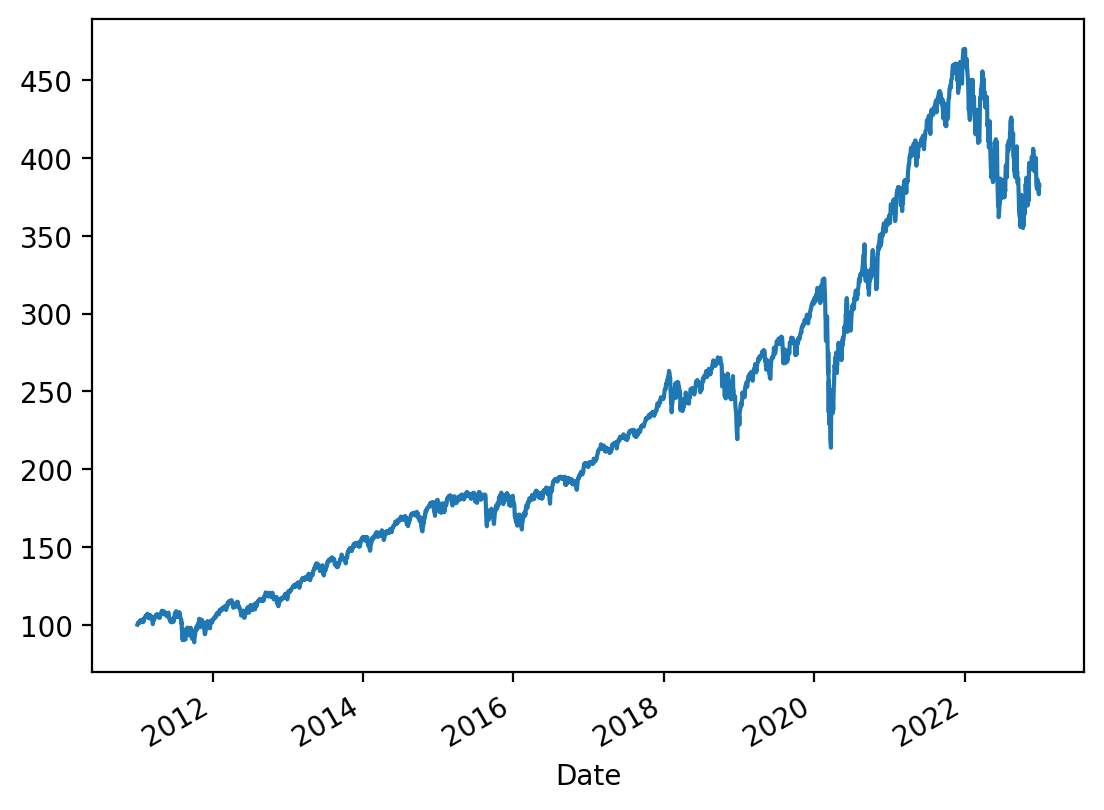

In [105]:
# row_data['Adj Close'].plot(title= ticker + '  Adjusted Close')
row_data['Adj Close'].plot()

In [7]:
threshold = 0.09/100   # Expense Ratio

In [8]:
row_data.ta.strategy('All')

131it [00:03, 43.51it/s]


In [9]:
stock_data = row_data.copy()

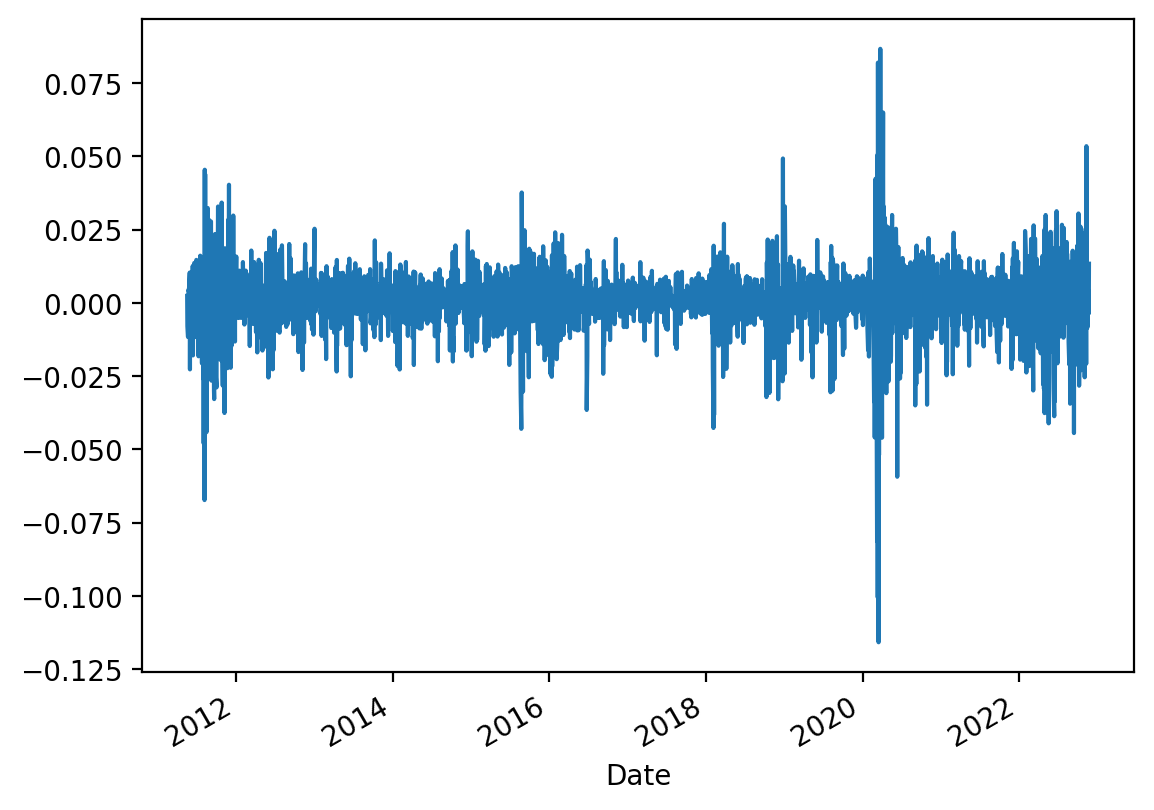

In [106]:
stock_data['Returns'] = np.log(row_data['Adj Close']).diff().fillna(0)
# stock_data['Returns'].plot(title= ticker + '  Daily Returns')
stock_data['Returns'].plot()
stock_data['Labels'] = stock_data['Returns'].apply(lambda x: 0 if x<=threshold else 1)

In [11]:
stock_data.query('Labels == 1').shape[0]

1459

<BarContainer object of 2 artists>

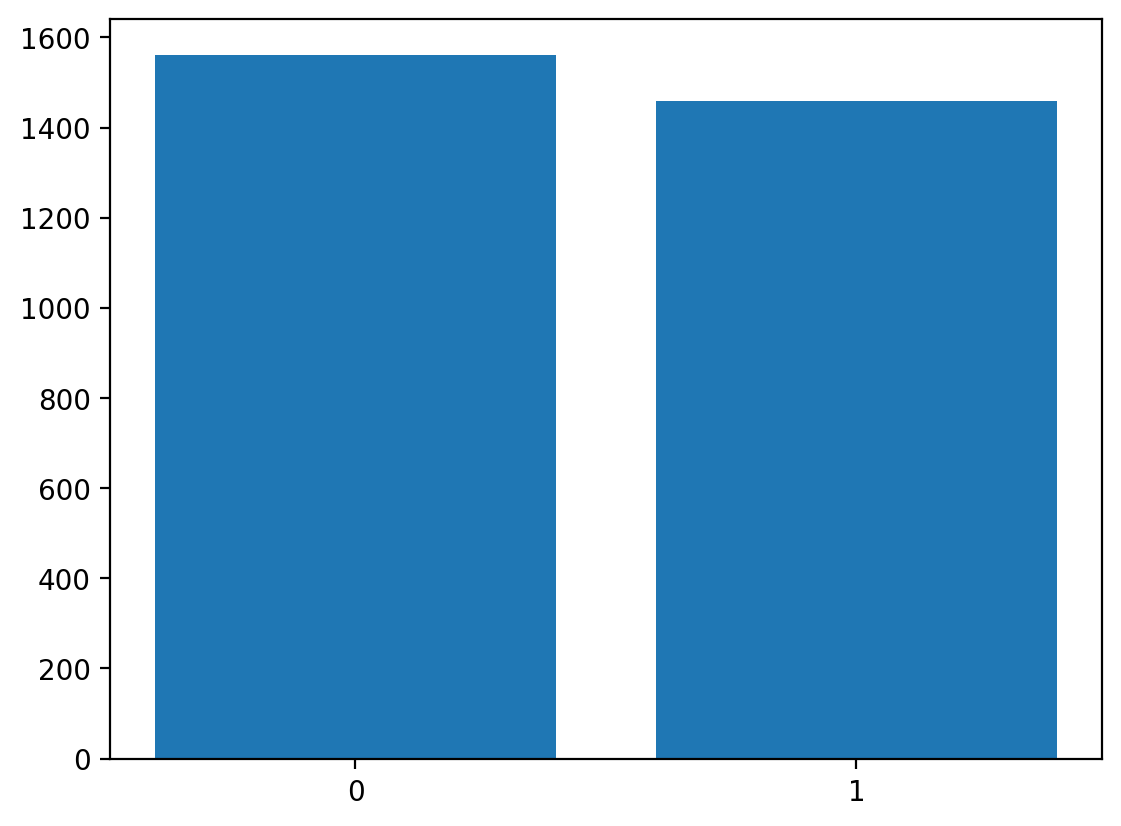

In [12]:
label_list = ['0', '1']
count0 = stock_data.query('Labels == 0').shape[0]
count1 = stock_data.query('Labels == 1').shape[0]
height = [count0, count1]
plt.bar(label_list, height=height)

In [13]:
stock_data.drop(['HILOl_13_21', 'HILOs_13_21', 'PSARl_0.02_0.2', 
                 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'QQEl_14_5_4.236', 
                 'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0', 
                 'Open', 'High', 'Low', 'Close', 'Adj Close'], 
                axis=1, inplace=True)

In [14]:
stock_data.describe().T

count          mean           std           min  \
Volume                       3021.0  1.106428e+08  6.434431e+07  2.027000e+07   
ABER_ZG_5_15                 3017.0  2.503349e+02  9.518406e+01  1.130060e+02   
ABER_SG_5_15                 3006.0  2.539932e+02  9.661298e+01  1.163644e+02   
ABER_XG_5_15                 3006.0  2.475736e+02  9.355612e+01  1.096476e+02   
ABER_ATR_5_15                3006.0  3.209786e+00  2.331560e+00  9.770435e-01   
ACCBL_20                     3002.0  2.431010e+02  9.147485e+01  1.077167e+02   
ACCBM_20                     3002.0  2.503653e+02  9.489745e+01  1.163625e+02   
ACCBU_20                     3002.0  2.575436e+02  9.849327e+01  1.235737e+02   
AD                           3021.0  1.639830e+10  7.824943e+09  5.067631e+07   
ADOSC_3_10                   3012.0  3.083129e+07  7.932924e+07 -4.047211e+08   
ADX_14                       2994.0  2.180187e+01  7.506001e+00  8.593231e+00   
DMP_14                       3008.0  1.075803e+01  7.393114e+00  2.481151e+00   
DMN_14                       3008.0  1.147402e+01  1.033336e+01  1.486291e+00   
ALMA_10_6.0_0.85             3011.0  2.501587e+02  9.520887e+01  0.000000e+00   
AMATe_LR_8_21_2              3021.0  6.229725e-01  4.847221e-01  0.000000e+00   
AMATe_SR_8_21_2              3021.0  3.697451e-01  4.828155e-01  0.000000e+00   
AO_5_34                      2988.0  1.265400e+00  7.988585e+00 -6.322320e+01   
OBV                          3021.0  2.760216e+09  1.854212e+09 -3.658298e+09   
OBV_min_2                    3020.0  2.705635e+09  1.871585e+09 -3.658298e+09   
OBV_max_2                    3020.0  2.815994e+09  1.834912e+09 -3.264596e+09   
OBVe_4                       3018.0  2.761955e+09  1.850118e+09 -3.194677e+09   
OBVe_12                      3010.0  2.766663e+09  1.841584e+09 -2.877561e+09   
AOBV_LR_2                    3021.0  5.524661e-01  4.973220e-01  0.000000e+00   
AOBV_SR_2                    3021.0  4.432307e-01  4.968490e-01  0.000000e+00   
APO_12_26                    2996.0  6.157589e-01  4.465749e+00 -3.391154e+01   
AROOND_14                    3007.0  4.185947e+01  3.622984e+01  0.000000e+00   
AROONU_14                    3007.0  6.218823e+01  3.594680e+01  0.000000e+00   
AROONOSC_14                  3007.0  2.032876e+01  6.382436e+01 -1.000000e+02   
ATRr_14                      3007.0  3.211102e+00  2.346820e+00  9.582159e-01   
BBL_5_2.0                    3017.0  2.465764e+02  9.340947e+01  1.089093e+02   
BBM_5_2.0                    3017.0  2.503983e+02  9.520682e+01  1.131780e+02   
BBU_5_2.0                    3017.0  2.542202e+02  9.711327e+01  1.172810e+02   
BBB_5_2.0                    3017.0  2.972898e+00  2.386078e+00  1.093546e-01   
BBP_5_2.0                    3017.0  5.536782e-01  2.869878e-01  3.524948e-03   
BIAS_SMA_26                  2996.0  4.768582e-03  2.774521e-02 -2.296642e-01   
BOP                          3021.0  5.831593e-02  5.259119e-01 -9.838320e-01   
AR_26                        2996.0  9.586569e+01  2.519094e+01  4.383098e+01   
BR_26                        2995.0  1.069462e+02  3.384585e+01  2.766871e+01   
CCI_14_0.015                 3008.0  2.538357e+01  1.056046e+02 -3.524832e+02   
CDL_2CROWS                   3021.0 -3.310162e-02  1.819385e+00 -1.000000e+02   
CDL_3BLACKCROWS              3021.0  0.000000e+00  0.000000e+00  0.000000e+00   
CDL_3INSIDE                  3021.0  3.641178e-01  1.420754e+01 -1.000000e+02   
CDL_3LINESTRIKE              3021.0  0.000000e+00  2.573425e+00 -1.000000e+02   
CDL_3OUTSIDE                 3021.0 -9.930487e-02  1.677638e+01 -1.000000e+02   
CDL_3STARSINSOUTH            3021.0  0.000000e+00  0.000000e+00  0.000000e+00   
CDL_3WHITESOLDIERS           3021.0  9.930487e-02  3.150224e+00  0.000000e+00   
CDL_ABANDONEDBABY            3021.0  0.000000e+00  0.000000e+00  0.000000e+00   
CDL_ADVANCEBLOCK             3021.0 -3.972195e-01  6.291046e+00 -1.000000e+02   
CDL_BELTHOLD                 3021.0  1.390268e+00  3.891816e+

In [15]:
stock_data.shape

(3021, 272)

In [16]:
stock_data.isna().sum()

Volume                          0
ABER_ZG_5_15                    4
ABER_SG_5_15                   15
ABER_XG_5_15                   15
ABER_ATR_5_15                  15
ACCBL_20                       19
ACCBM_20                       19
ACCBU_20                       19
AD                              0
ADOSC_3_10                      9
ADX_14                         27
DMP_14                         13
DMN_14                         13
ALMA_10_6.0_0.85               10
AMATe_LR_8_21_2                 0
AMATe_SR_8_21_2                 0
AO_5_34                        33
OBV                             0
OBV_min_2                       1
OBV_max_2                       1
OBVe_4                          3
OBVe_12                        11
AOBV_LR_2                       0
AOBV_SR_2                       0
APO_12_26                      25
AROOND_14                      14
AROONU_14                      14
AROONOSC_14                    14
ATRr_14                        14
BBL_5_2.0     

In [17]:
# drop nan values
stock_data = stock_data.dropna(axis=0)

In [18]:
stock_data.isna().sum()

Volume                         0
ABER_ZG_5_15                   0
ABER_SG_5_15                   0
ABER_XG_5_15                   0
ABER_ATR_5_15                  0
ACCBL_20                       0
ACCBM_20                       0
ACCBU_20                       0
AD                             0
ADOSC_3_10                     0
ADX_14                         0
DMP_14                         0
DMN_14                         0
ALMA_10_6.0_0.85               0
AMATe_LR_8_21_2                0
AMATe_SR_8_21_2                0
AO_5_34                        0
OBV                            0
OBV_min_2                      0
OBV_max_2                      0
OBVe_4                         0
OBVe_12                        0
AOBV_LR_2                      0
AOBV_SR_2                      0
APO_12_26                      0
AROOND_14                      0
AROONU_14                      0
AROONOSC_14                    0
ATRr_14                        0
BBL_5_2.0                      0
BBM_5_2.0 

# Features Selection

In [19]:
y = stock_data.iloc[:,-1:]
X = stock_data.iloc[:,:-2]

In [20]:
# class frequency
c = stock_data['Returns'].value_counts()

# class weight function
def cwts(stock_data):
    c0, c1 = np.bincount(stock_data['Labels'])
    w0=(1/c0)*(len(stock_data['Returns']))/2 
    w1=(1/c1)*(len(stock_data['Returns']))/2 
    return {0: w0, 1: w1}

# check class weights
class_weight = cwts(stock_data)
class_weight

{0: 0.966977985323549, 1: 1.0353571428571429}

## Borutapy

In [21]:
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, 
                                class_weight=cwts(stock_data), 
                                random_state=42, 
                                max_depth=5)

# train the model
forest.fit(X, y)

RandomForestClassifier(class_weight={0: 0.966977985323549,
                                     1: 1.0353571428571429},
                       max_depth=5, n_jobs=-1, random_state=42)

In [22]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=0)

# find all relevant features
# takes input in array format not as dataframe
X_ary = np.array(X)
y_ary = np.array(y)
feat_selector.fit(X_ary, y_ary) 

# check selected features
print(feat_selector.support_)

# check ranking of features
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_ary)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	270
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	63
Tentative: 	44
Rejected: 	163
Iteration: 	9 / 100
Confirmed: 	63
Tentative: 	44
Rejected: 	163
Iteration: 	10 / 100
Confirmed: 	63
Tentative: 	44
Rejected: 	163
Iteration: 	11 / 100
Confirmed: 	63
Tentative: 	44
Rejected: 	163
Iteration: 	12 / 100
Confirmed: 	63
Tentative: 	34
Rejected: 	173
Iteration: 	13 / 100
Confirmed: 	63
Tentative: 	34
Rejected: 	173
Iteration: 	14 / 100
Confirmed: 	63
Tentative: 	34
Rejected: 	173
Iteration: 	15 / 100
Confirmed: 	63
Tentative: 	34
Rejected: 	173
Iteration: 	16 / 100
Confirmed: 	

In [23]:
# zip my names, ranks, and decisions in a single iterable
feature_names = X.columns
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print(f'Feature: {feat[0]:<30} Rank: {feat[1]:<5} Keep: {feat[2]}')

Feature: Volume                         Rank: 3     Keep: False
Feature: ABER_ZG_5_15                   Rank: 108   Keep: False
Feature: ABER_SG_5_15                   Rank: 163   Keep: False
Feature: ABER_XG_5_15                   Rank: 97    Keep: False
Feature: ABER_ATR_5_15                  Rank: 49    Keep: False
Feature: ACCBL_20                       Rank: 114   Keep: False
Feature: ACCBM_20                       Rank: 104   Keep: False
Feature: ACCBU_20                       Rank: 129   Keep: False
Feature: AD                             Rank: 89    Keep: False
Feature: ADOSC_3_10                     Rank: 1     Keep: True
Feature: ADX_14                         Rank: 65    Keep: False
Feature: DMP_14                         Rank: 26    Keep: False
Feature: DMN_14                         Rank: 48    Keep: False
Feature: ALMA_10_6.0_0.85               Rank: 134   Keep: False
Feature: AMATe_LR_8_21_2                Rank: 12    Keep: False
Feature: AMATe_SR_8_21_2                R

In [24]:
selected_rf_features = pd.DataFrame({'Feature':feature_names,
                                     'Ranking':feat_selector.ranking_})

# selected_rf_features#.sort_values(by='Ranking') 

selected_rf_features[selected_rf_features['Ranking']==1]

Feature  Ranking
9             ADOSC_3_10        1
22             AOBV_LR_2        1
23             AOBV_SR_2        1
25             AROOND_14        1
26             AROONU_14        1
32             BBB_5_2.0        1
33             BBP_5_2.0        1
34           BIAS_SMA_26        1
35                   BOP        1
38          CCI_14_0.015        1
48          CDL_BELTHOLD        1
50   CDL_CLOSINGMARUBOZU        1
57         CDL_ENGULFING        1
63        CDL_HANGINGMAN        1
64            CDL_HARAMI        1
65       CDL_HARAMICROSS        1
72            CDL_INSIDE        1
78          CDL_LONGLINE        1
79          CDL_MARUBOZU        1
80       CDL_MATCHINGLOW        1
90         CDL_SHORTLINE        1
101          open_Z_30_1        1
102          high_Z_30_1        1
103           low_Z_30_1        1
104         close_Z_30_1        1
105                CFO_9        1
106                CG_10        1
111               CMO_14        1
113               CTI_12        1
115                DEC_1        1
120               DPO_20        1
121           EBSW_40_10        1
122               EFI_13        1
127             BULLP_13        1
129          FISHERT_9_1        1
130         FISHERTs_9_1        1
149                INC_1        1
156                K_9_3        1
157                D_9_3        1
158                J_9_3        1
162         KVO_34_55_13        1
165             LOGRET_1        1
176               MOM_10        1
181             PCTRET_1        1
182               PGO_14        1
192                 PVOL        1
193                  PVR        1
201               ROC_10        1
202               RSI_14        1
203               RSX_14        1
206               RVI_14        1
209              SLOPE_1        1
213          SMIo_5_20_5        1
229        STOCHk_14_3_3        1
230        STOCHd_14_3_3        1
231  STOCHRSIk_14_14_3_3        1
232  STOCHRSId_14_14_3_3        1
238      THERMO_20_2_0.5        1
241     THERMOs_20_2_0.5        1
252          TRUERANGE_1        1
255           TTM_TRND_6        1
257           UO_7_14_28        1
266             WILLR_14        1
269                ZS_30        1

In [25]:
selected = list(selected_rf_features[selected_rf_features['Ranking']==1]['Feature'])

In [26]:
X_selected = stock_data[selected]

In [27]:
X_selected.shape # The number of feature is 64

(2899, 64)

## K-Means clustering

In [28]:
X = X_selected

### Elbow Plot

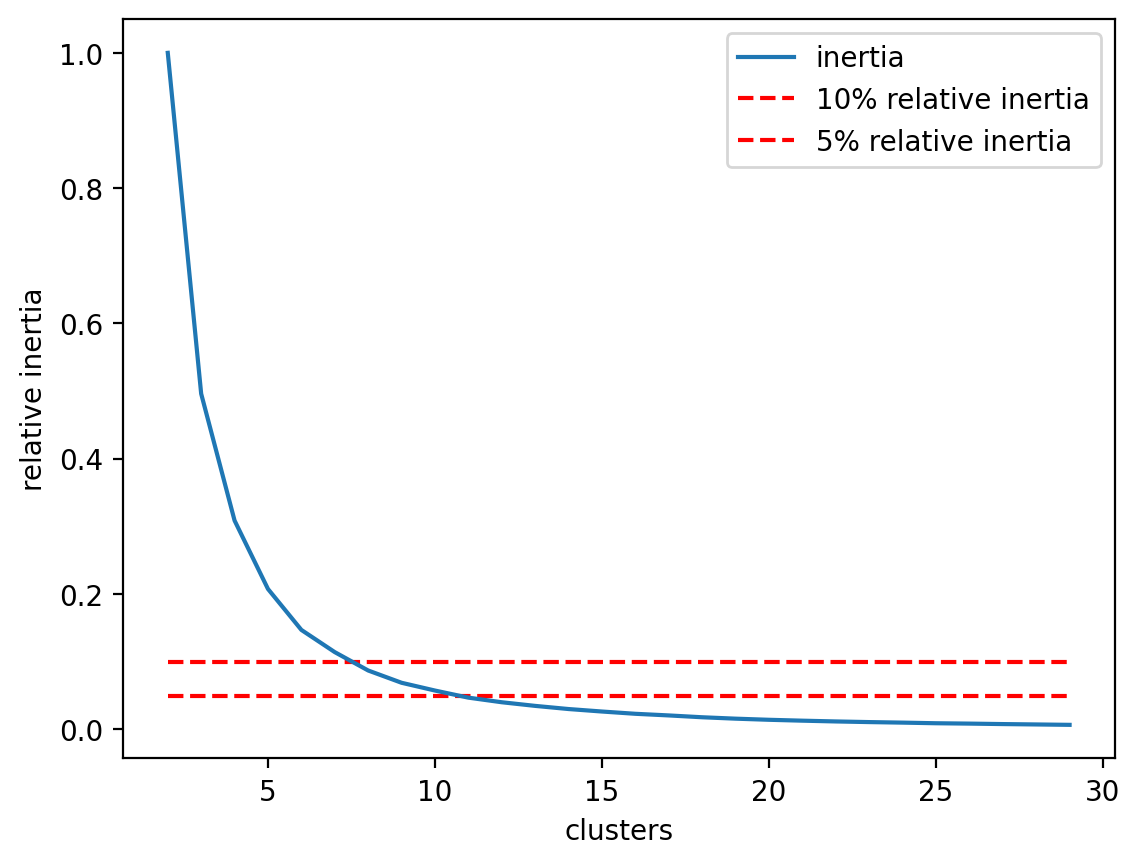

In [29]:
n_clusters = range(2, 30)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters, np.divide(inertia,inertia[0]))
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

### Silhouette Coefficient

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
set_seeds(2023)
Silhouette_list = []
for i in [7, 8, 9, 10]:
    KMean_test= KMeans(n_clusters=i)
    KMean_test.fit(X)
    label_test=KMean_test.predict(X)
    score = silhouette_score(X, label_test)
    Silhouette_list.append(score)
#     print(f'Silhouette Score: {silhouette_score(Xlabel_test_test)}')

In [32]:
Silhouette_list

[0.5301639574706409, 0.5318122369209507, 0.522190364323992, 0.5197598976215557]

Text(0, 0.5, 'Silhouette Score')

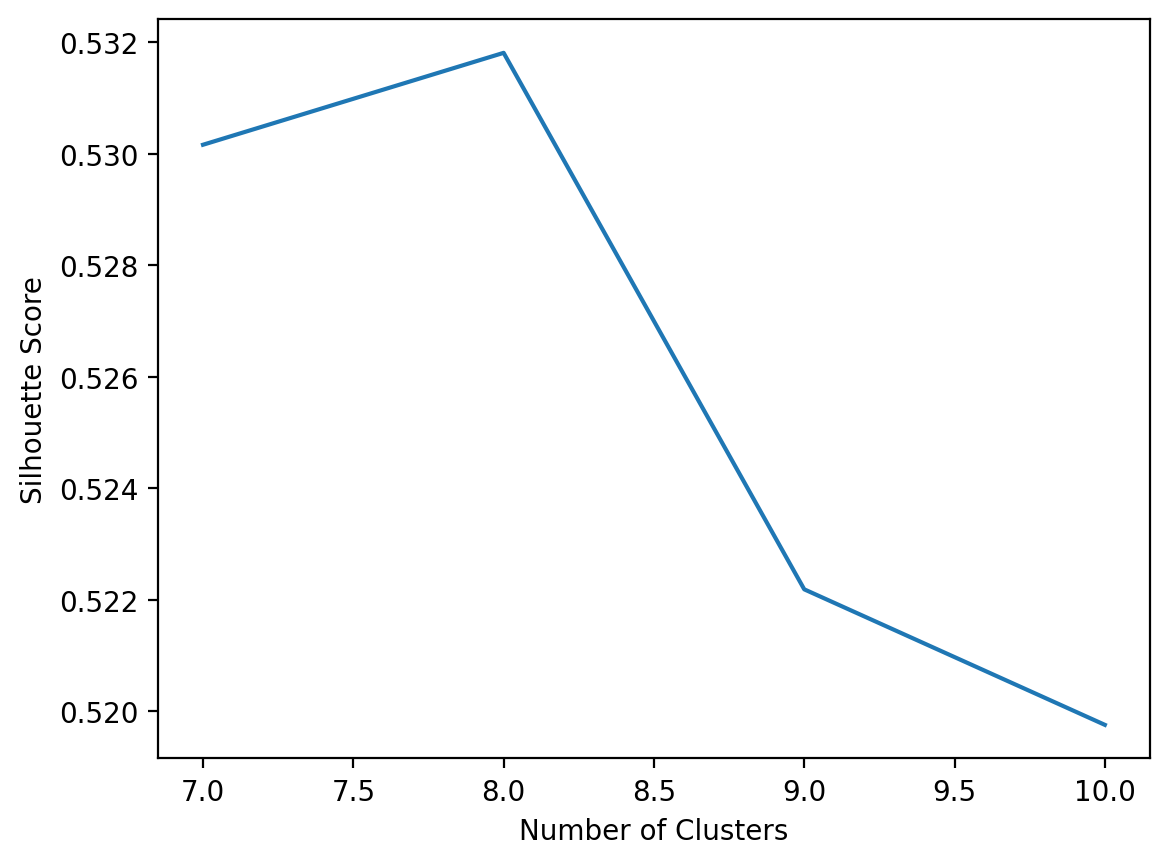

In [33]:
Silhouette_label = [7, 8, 9, 10]
plt.plot(Silhouette_label , Silhouette_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [34]:
KMean_test= KMeans(n_clusters=7)
KMean_test.fit(X)
label_test=KMean_test.predict(X)

In [35]:
print(f'Silhouette Score(n=7): {silhouette_score(X, label_test)}')

Silhouette Score(n=7): 0.5310282741634225


In [36]:
# Normalize and fit the model
pipe = Pipeline([("normalization", MinMaxScaler()), ("cluster", KMeans(n_clusters=7))])

In [37]:
# Fit Model
pipe.fit(X.T)

# Assign Label
labels = pipe.predict(X.T)

In [38]:
Features = X.columns
# Create dataframe to hold cluster details
df = pd.DataFrame({'Cluster': labels, 
                    'Features': Features, 
                   'X_mean': X.mean(axis=0)}
                  ).sort_values(by=['Cluster'], axis = 0)

df = df.reset_index(drop=True)
df

# 'ATR': weekly_atr.mean(axis=1)

Cluster             Features        X_mean
0         0           EBSW_40_10  2.145788e-01
1         0               CMO_14  1.037855e+01
2         0               CTI_12  2.068876e-01
3         0                DEC_1  4.522249e-01
4         0               DPO_20 -1.420945e-01
5         0             WILLR_14 -3.583892e+01
6         0             BULLP_13  1.895417e+00
7         0          FISHERT_9_1  7.843556e-01
8         0         FISHERTs_9_1  7.832866e-01
9         0                INC_1  5.443256e-01
10        0             LOGRET_1  3.762303e-04
11        0               MOM_10  8.963332e-01
12        0             PCTRET_1  4.393443e-04
13        0               PGO_14  2.717827e-01
14        0                  PVR  2.410486e+00
15        0               ROC_10  4.224668e-01
16        0              SLOPE_1  9.159710e-02
17        0          SMIo_5_20_5  1.290773e-04
18        0      THERMO_20_2_0.5  2.153073e+00
19        0     THERMOs_20_2_0.5  7.392204e-01
20        0          TRUERANGE_1  3.254581e+00
21        0           TTM_TRND_6  2.383581e-01
22        0                CG_10 -5.496923e+00
23        0                CFO_9 -4.766467e-04
24        0                ZS_30  4.457460e-01
25        0           low_Z_30_1  4.301531e-01
26        0         close_Z_30_1  4.457460e-01
27        0         CDL_BELTHOLD  1.276302e+00
28        0  CDL_CLOSINGMARUBOZU  4.622284e+00
29        0        CDL_ENGULFING -1.034840e+00
30        0            BBP_5_2.0  5.541960e-01
31        0            BBB_5_2.0  2.981836e+00
32        0            AROOND_14  4.181491e+01
33        0            AOBV_SR_2  4.432563e-01
34        0                  BOP  5.717779e-02
35        0       CDL_HANGINGMAN -3.759917e+00
36        0      CDL_HARAMICROSS -5.174198e-01
37        0           CDL_INSIDE  1.241808e-02
38        0            AOBV_LR_2  5.567437e-01
39        0         CDL_LONGLINE  4.415316e+00
40        0         CDL_MARUBOZU  1.345291e+00
41        0      CDL_MATCHINGLOW  1.241808e+00
42        0        CDL_SHORTLINE  3.345981e+00
43        0          open_Z_30_1  4.494110e-01
44        0          high_Z_30_1  4.684169e-01
45        0           CDL_HARAMI -2.759572e-01
46        0          BIAS_SMA_26  4.772083e-03
47        1                 PVOL  2.503084e+10
48        2           ADOSC_3_10  2.980900e+07
49        3               EFI_13 -2.309790e+07
50        4         KVO_34_55_13 -3.152470e+04
51        5               RSX_14  5.643907e+01
52        5               RVI_14  5.489488e+01
53        5                J_9_3  6.234593e+01
54        5        STOCHk_14_3_3  6.414345e+01
55        5        STOCHd_14_3_3  6.412255e+01
56        5  STOCHRSIk_14_14_3_3  5.624224e+01
57        5  STOCHRSId_14_14_3_3  5.621669e+01
58        5            AROONU_14  6.212980e+01
59        5                D_9_3  6.226407e+01
60        5                K_9_3  6.229136e+01
61        5           UO_7_14_28  5.602435e+01
62        5               RSI_14  5.518928e+01
63        6         CCI_14_0.015  2.590161e+01

Text(0, 0.5, 'Cluster')

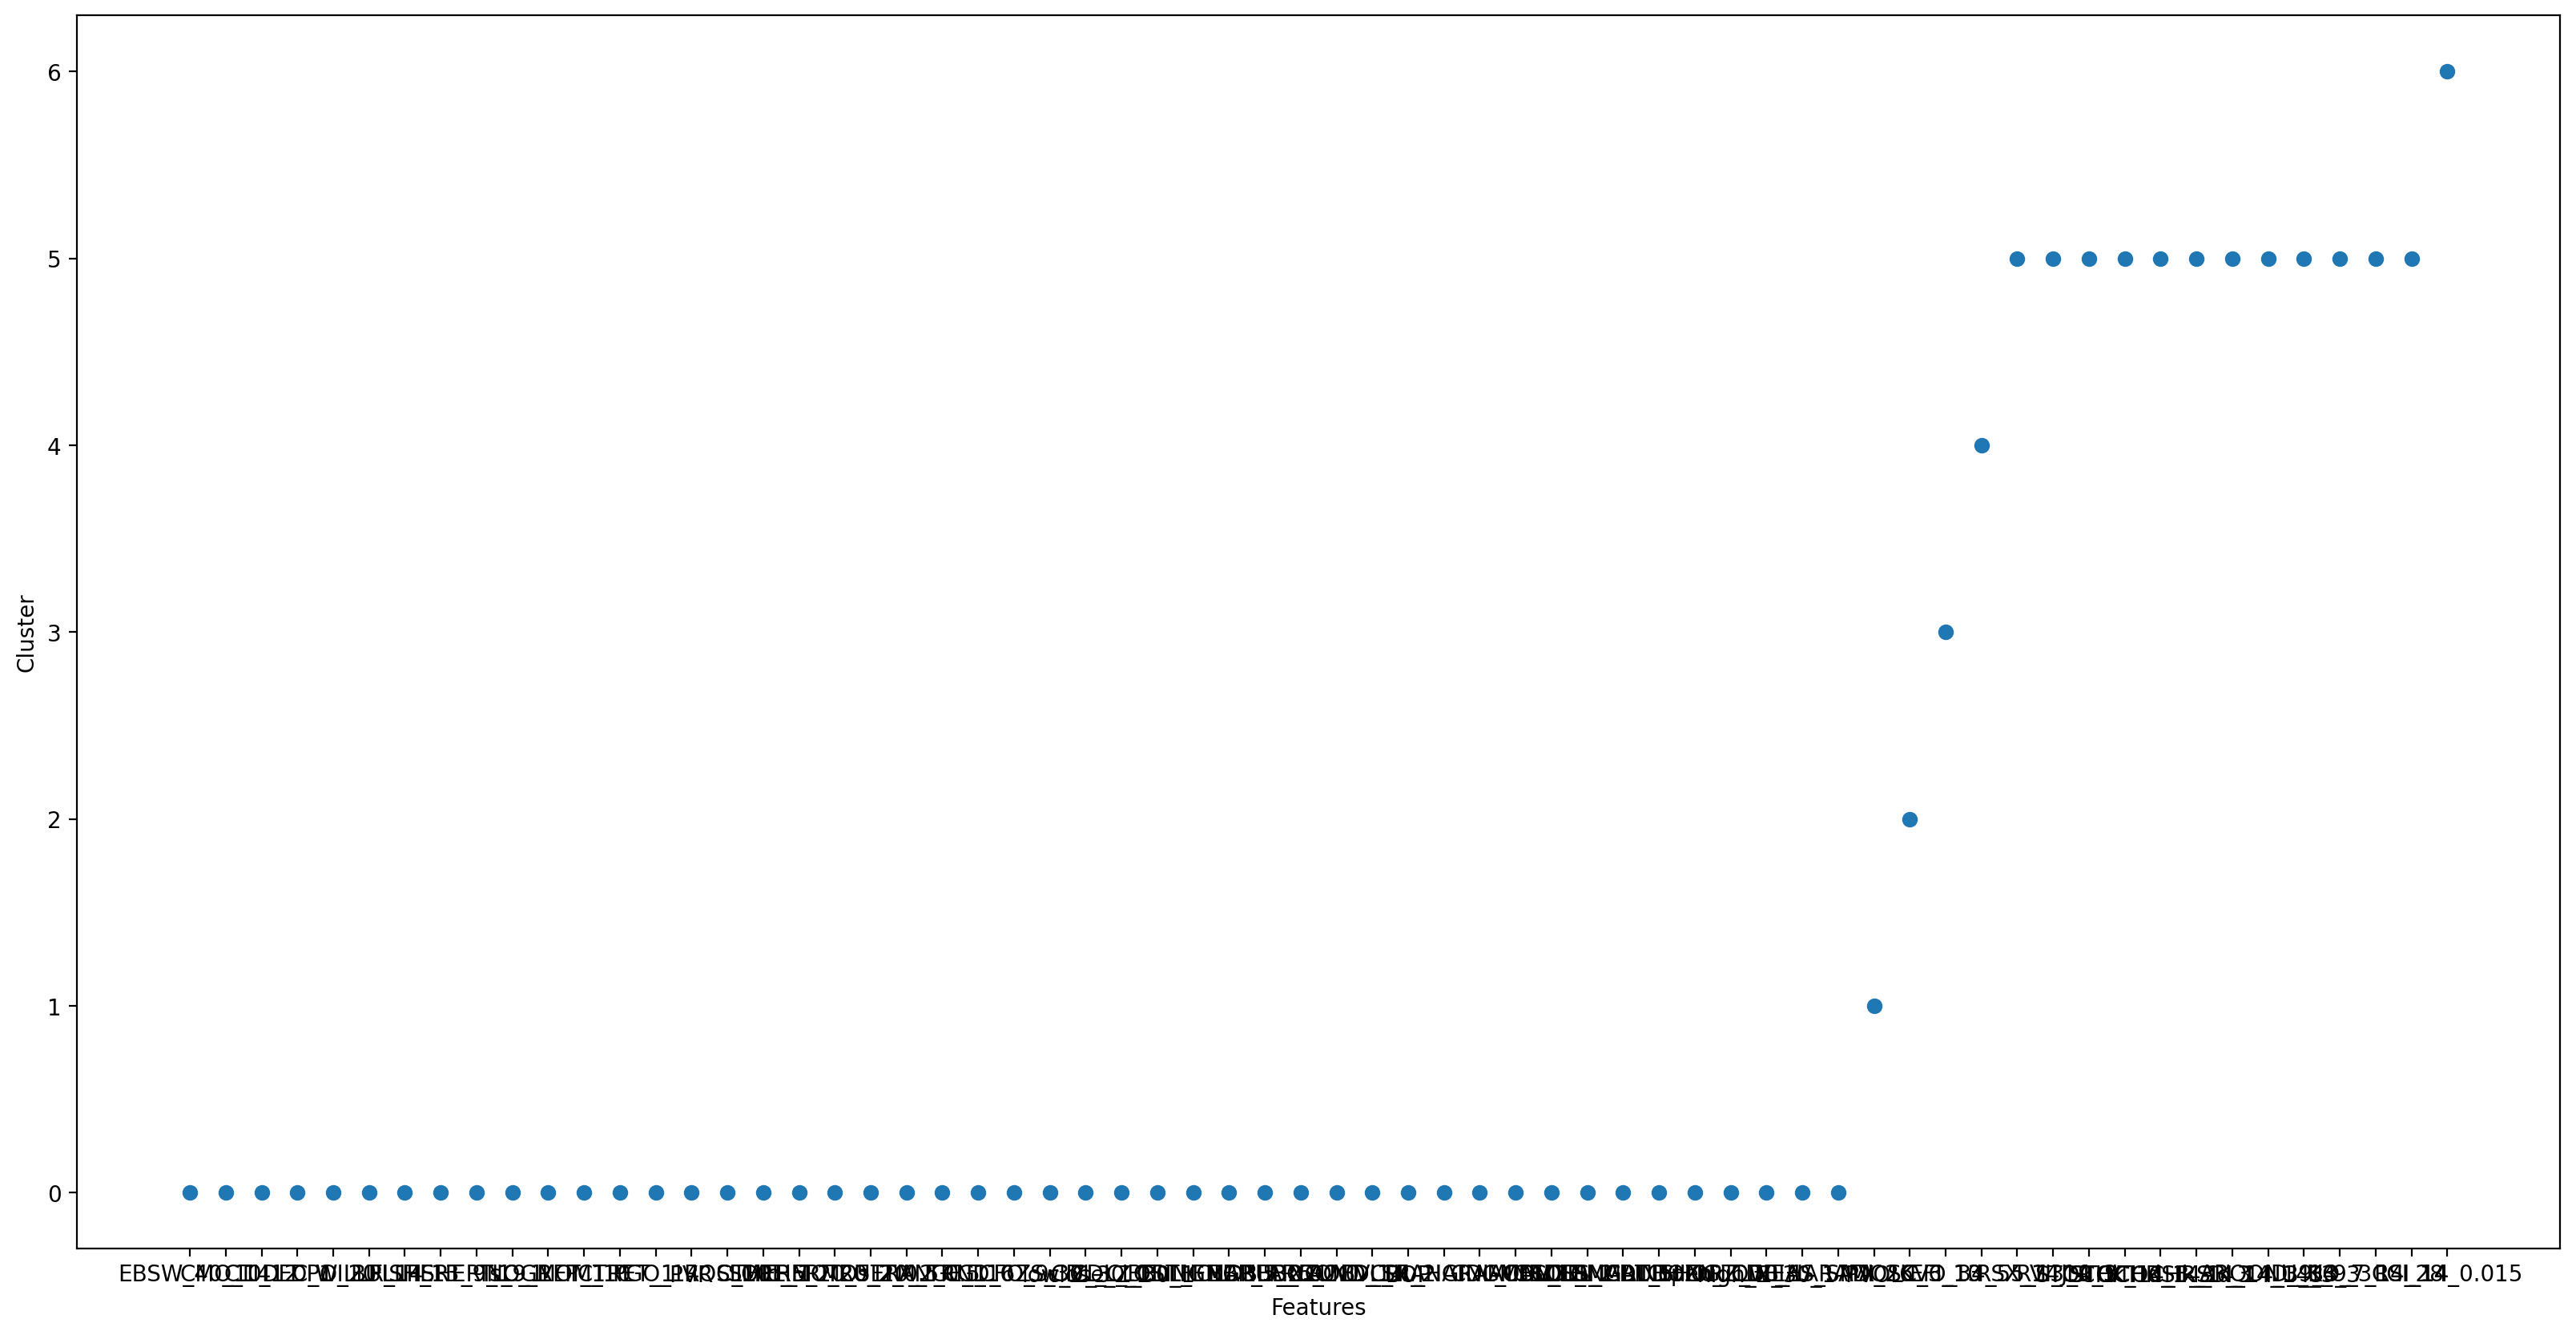

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(df.Features, df.Cluster)
plt.xlabel('Features')
plt.ylabel('Cluster')
# plt.title('SPY Features Clustering');

In [40]:
pipe.get_params()

{'memory': None,
 'steps': [('normalization', MinMaxScaler()),
  ('cluster', KMeans(n_clusters=7))],
 'verbose': False,
 'normalization': MinMaxScaler(),
 'cluster': KMeans(n_clusters=7),
 'normalization__clip': False,
 'normalization__copy': True,
 'normalization__feature_range': (0, 1),
 'cluster__algorithm': 'auto',
 'cluster__copy_x': True,
 'cluster__init': 'k-means++',
 'cluster__max_iter': 300,
 'cluster__n_clusters': 7,
 'cluster__n_init': 10,
 'cluster__n_jobs': 'deprecated',
 'cluster__precompute_distances': 'deprecated',
 'cluster__random_state': None,
 'cluster__tol': 0.0001,
 'cluster__verbose': 0}

In [41]:
pipe['cluster'].cluster_centers_

array([[3.78908751e-04, 1.22604226e-03, 2.82096284e-03, ...,
        2.70220940e-09, 1.18494592e-09, 5.50018479e-10],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.22050832e-03, 3.12714886e-03, 3.72962350e-03, ...,
        8.14431544e-04, 1.70813081e-03, 2.11729830e-03],
       ...,
       [0.00000000e+00, 8.32559799e-04, 2.26207208e-03, ...,
        1.53280712e-04, 2.01304017e-04, 2.08037790e-04],
       [3.78911025e-04, 1.22604386e-03, 2.82096424e-03, ...,
        4.68488946e-09, 4.55246113e-09, 3.26746973e-09],
       [3.78908452e-04, 1.22603983e-03, 2.82095370e-03, ...,
        4.54573273e-09, 3.64138086e-09, 3.27374184e-09]])

In [42]:
pipe['cluster'].cluster_centers_.shape

(7, 2899)

## SOM

In [43]:
X = df[['X_mean']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

$Q = 5\times\sqrt{I}$

In [44]:
# Initialize a 15x15 SOM - Thumb rule is 5 * sqrt(n) > 5x5 SOM
som = MiniSom(40, 40, 1, learning_rate=0.5, sigma=5, random_seed=2023)

# Initialize with randon weights
som.random_weights_init(X)

# Trains SOM with 10000 iterations
som.train_batch(X,10000, verbose=True)

 [   346 / 10000 ]   3% - 0:00:02 left 

 [   665 / 10000 ]   7% - 0:00:02 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 7.598641169807632e-12


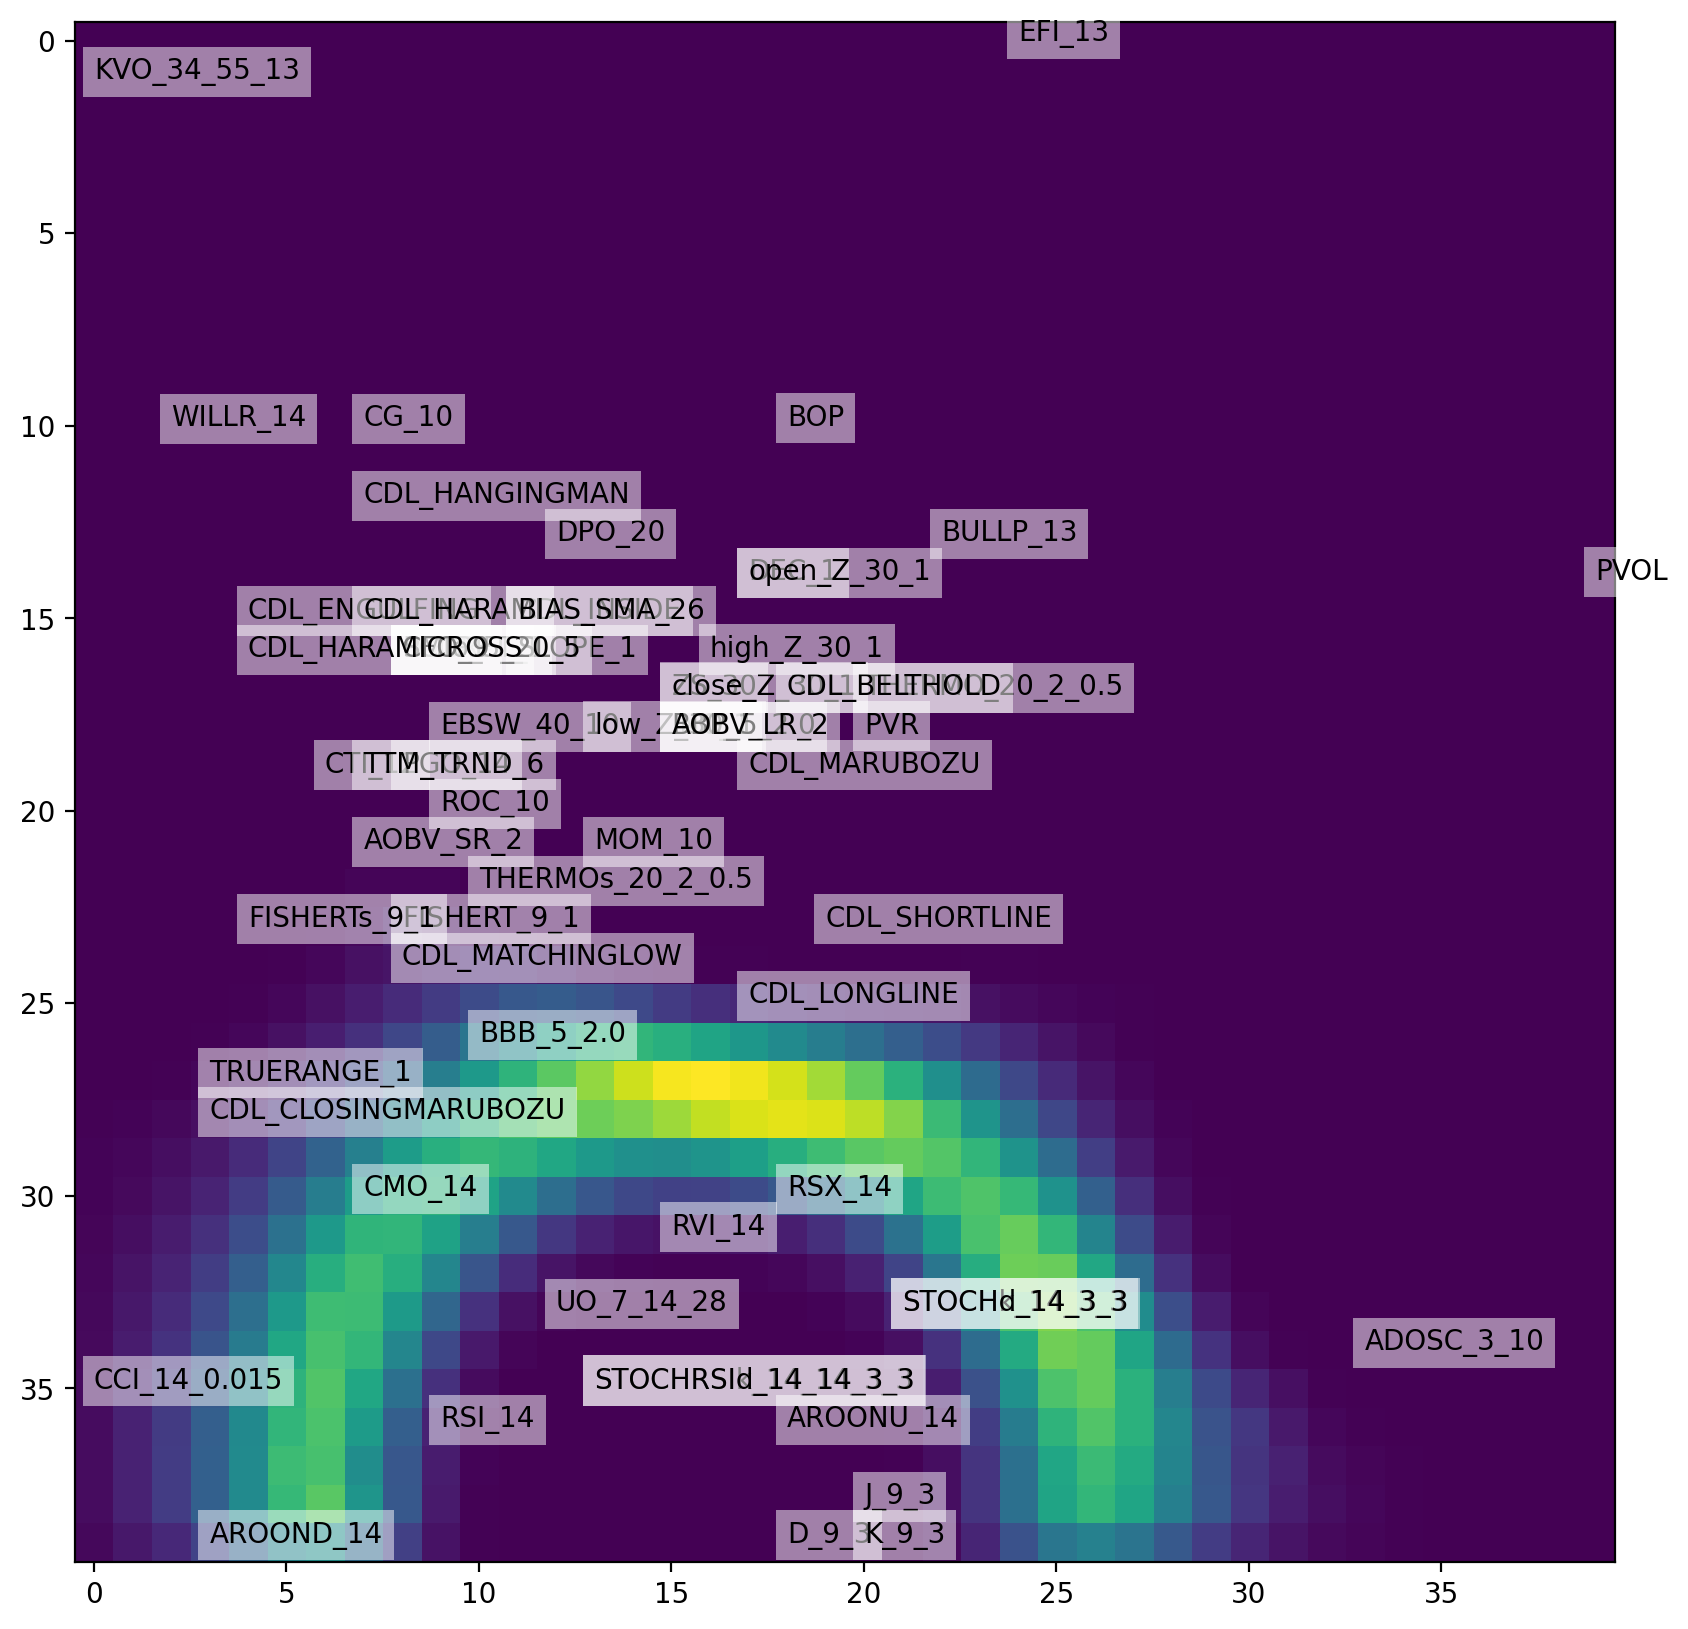

In [109]:
# Plot SOM
plt.figure(figsize=(20, 10))
for ix in range(len(X)):
    winner = som.winner(X[ix])
    plt.text(winner[0], winner[1], df.Features[ix], bbox=dict(facecolor='white', alpha=0.5, lw=0)) 
plt.imshow(som.distance_map())
plt.grid(False)
# plt.title('Self Organizing Maps');

In [46]:
corresponding_listnding_list = []
# List the corresponding companies
for ix in range(len(X)):
    winner = som.winner(X[ix])
#     corresponding_list.append(winner)
    print(winner[0], winner[1], df['Features'][ix])

9 18 EBSW_40_10
7 30 CMO_14
6 19 CTI_12
17 14 DEC_1
12 13 DPO_20
2 10 WILLR_14
22 13 BULLP_13
8 23 FISHERT_9_1
4 23 FISHERTs_9_1
15 18 INC_1
8 16 LOGRET_1
13 21 MOM_10
8 16 PCTRET_1
8 19 PGO_14
20 18 PVR
9 20 ROC_10
11 16 SLOPE_1
8 16 SMIo_5_20_5
20 17 THERMO_20_2_0.5
10 22 THERMOs_20_2_0.5
3 27 TRUERANGE_1
7 19 TTM_TRND_6
7 10 CG_10
8 16 CFO_9
15 17 ZS_30
13 18 low_Z_30_1
15 17 close_Z_30_1
18 17 CDL_BELTHOLD
3 28 CDL_CLOSINGMARUBOZU
4 15 CDL_ENGULFING
15 18 BBP_5_2.0
10 26 BBB_5_2.0
3 39 AROOND_14
7 21 AOBV_SR_2
18 10 BOP
7 12 CDL_HANGINGMAN
4 16 CDL_HARAMICROSS
11 15 CDL_INSIDE
15 18 AOBV_LR_2
17 25 CDL_LONGLINE
17 19 CDL_MARUBOZU
8 24 CDL_MATCHINGLOW
19 23 CDL_SHORTLINE
17 14 open_Z_30_1
16 16 high_Z_30_1
7 15 CDL_HARAMI
11 15 BIAS_SMA_26
39 14 PVOL
33 34 ADOSC_3_10
24 0 EFI_13
0 1 KVO_34_55_13
18 30 RSX_14
15 31 RVI_14
20 38 J_9_3
21 33 STOCHk_14_3_3
21 33 STOCHd_14_3_3
13 35 STOCHRSIk_14_14_3_3
13 35 STOCHRSId_14_14_3_3
18 36 AROONU_14
18 39 D_9_3
20 39 K_9_3
12 33 UO_7_14_28
9 3

```['BEARP_13', 'EBSW_40_10', 'BULLP_13', 'WILLR_14', 'PVR', 'TRUERANGE_1', 'CMO_14', 'AROOND_14', 'BBB_5_2.0', 'PVOL', 'EFI_13', 'Volume', 'KVO_34_55_13', 'AROONU_14', 'CCI_14_0.015']```

```['EBSW_40_10', 'CMO_14', 'DPO_20', 'WILLR_14', 'BULLP_13', 'PVR', 'TRUERANGE_1', 'ADOSC_3_10', 'EFI_13', 'KVO_34_55_13']```

```['KVO_34_55_13', 'CCI_14_0.015', 'PVOL', 'EFI_13', 'ADOSC_3_10', 'D_9_3', 'BOP']```

In [47]:
# selected2 = ['KVO_34_55_13', 'CCI_14_0.015', 'PVOL', 'EFI_13', 'ADOSC_3_10', 'D_9_3', 'BOP']

In [48]:
selected2 = ['KVO_34_55_13', 'EBSW_40_10', 'DPO_20', 
             'WILLR_14', 'BULLP_13', 'PVR', 
             'TRUERANGE_1', 'EFI_13', 'ADOSC_3_10', 'BOP']

In [49]:
# selected2 = ['EBSW_40_10', 'CMO_14', 'DPO_20', 
#              'WILLR_14', 'BULLP_13', 'PVR', 
#              'TRUERANGE_1', 'ADOSC_3_10', 
#              'EFI_13', 'KVO_34_55_13']

https://github.com/JustGlowing/minisom/blob/master/examples/FeatureSelection.ipynb

# Exploratory Data Analysis

In [50]:
X_selected = X_selected[selected2]

In [51]:
X_selected.shape

(2899, 10)

## Features Describe

In [52]:
X_selected.describe().T

count          mean           std           min           25%  \
KVO_34_55_13  2899.0 -3.152470e+04  7.442190e+06 -5.814442e+07 -4.040862e+06   
EBSW_40_10    2899.0  2.145788e-01  8.124232e-01 -9.999737e-01 -7.566179e-01   
DPO_20        2899.0 -1.420945e-01  3.917509e+00 -2.789100e+01 -1.595507e+00   
WILLR_14      2899.0 -3.583892e+01  3.061310e+01 -1.000000e+02 -5.989283e+01   
BULLP_13      2899.0  1.895417e+00  3.997989e+00 -2.681032e+01  3.935218e-01   
PVR           2899.0  2.410486e+00  1.016686e+00  1.000000e+00  2.000000e+00   
TRUERANGE_1   2899.0  3.254581e+00  3.039621e+00  4.400024e-01  1.389999e+00   
EFI_13        2899.0 -2.309790e+07  1.559325e+08 -2.469719e+09 -4.078148e+07   
ADOSC_3_10    2899.0  2.980900e+07  7.917299e+07 -4.047211e+08 -1.544632e+07   
BOP           2899.0  5.717779e-02  5.265266e-01 -9.838320e-01 -3.874843e-01   

                       50%           75%           max  
KVO_34_55_13  4.774819e+05  4.347242e+06  2.995325e+07  
EBSW_40_10    6.575463e-01  9.683719e-01  9.999898e-01  
DPO_20        3.150635e-02  1.299499e+00  2.668348e+01  
WILLR_14     -2.692308e+01 -8.134081e+00 -0.000000e+00  
BULLP_13      1.819845e+00  3.505296e+00  2.179554e+01  
PVR           2.000000e+00  3.000000e+00  4.000000e+00  
TRUERANGE_1   2.190002e+00  3.914993e+00  3.196001e+01  
EFI_13        7.807426e+06  3.476777e+07  4.330140e+08  
ADOSC_3_10    3.527280e+07  7.614915e+07  3.343292e+08  
BOP           7.758349e-02  5.138909e-01  1.000000e+00

## Correlation Matrix

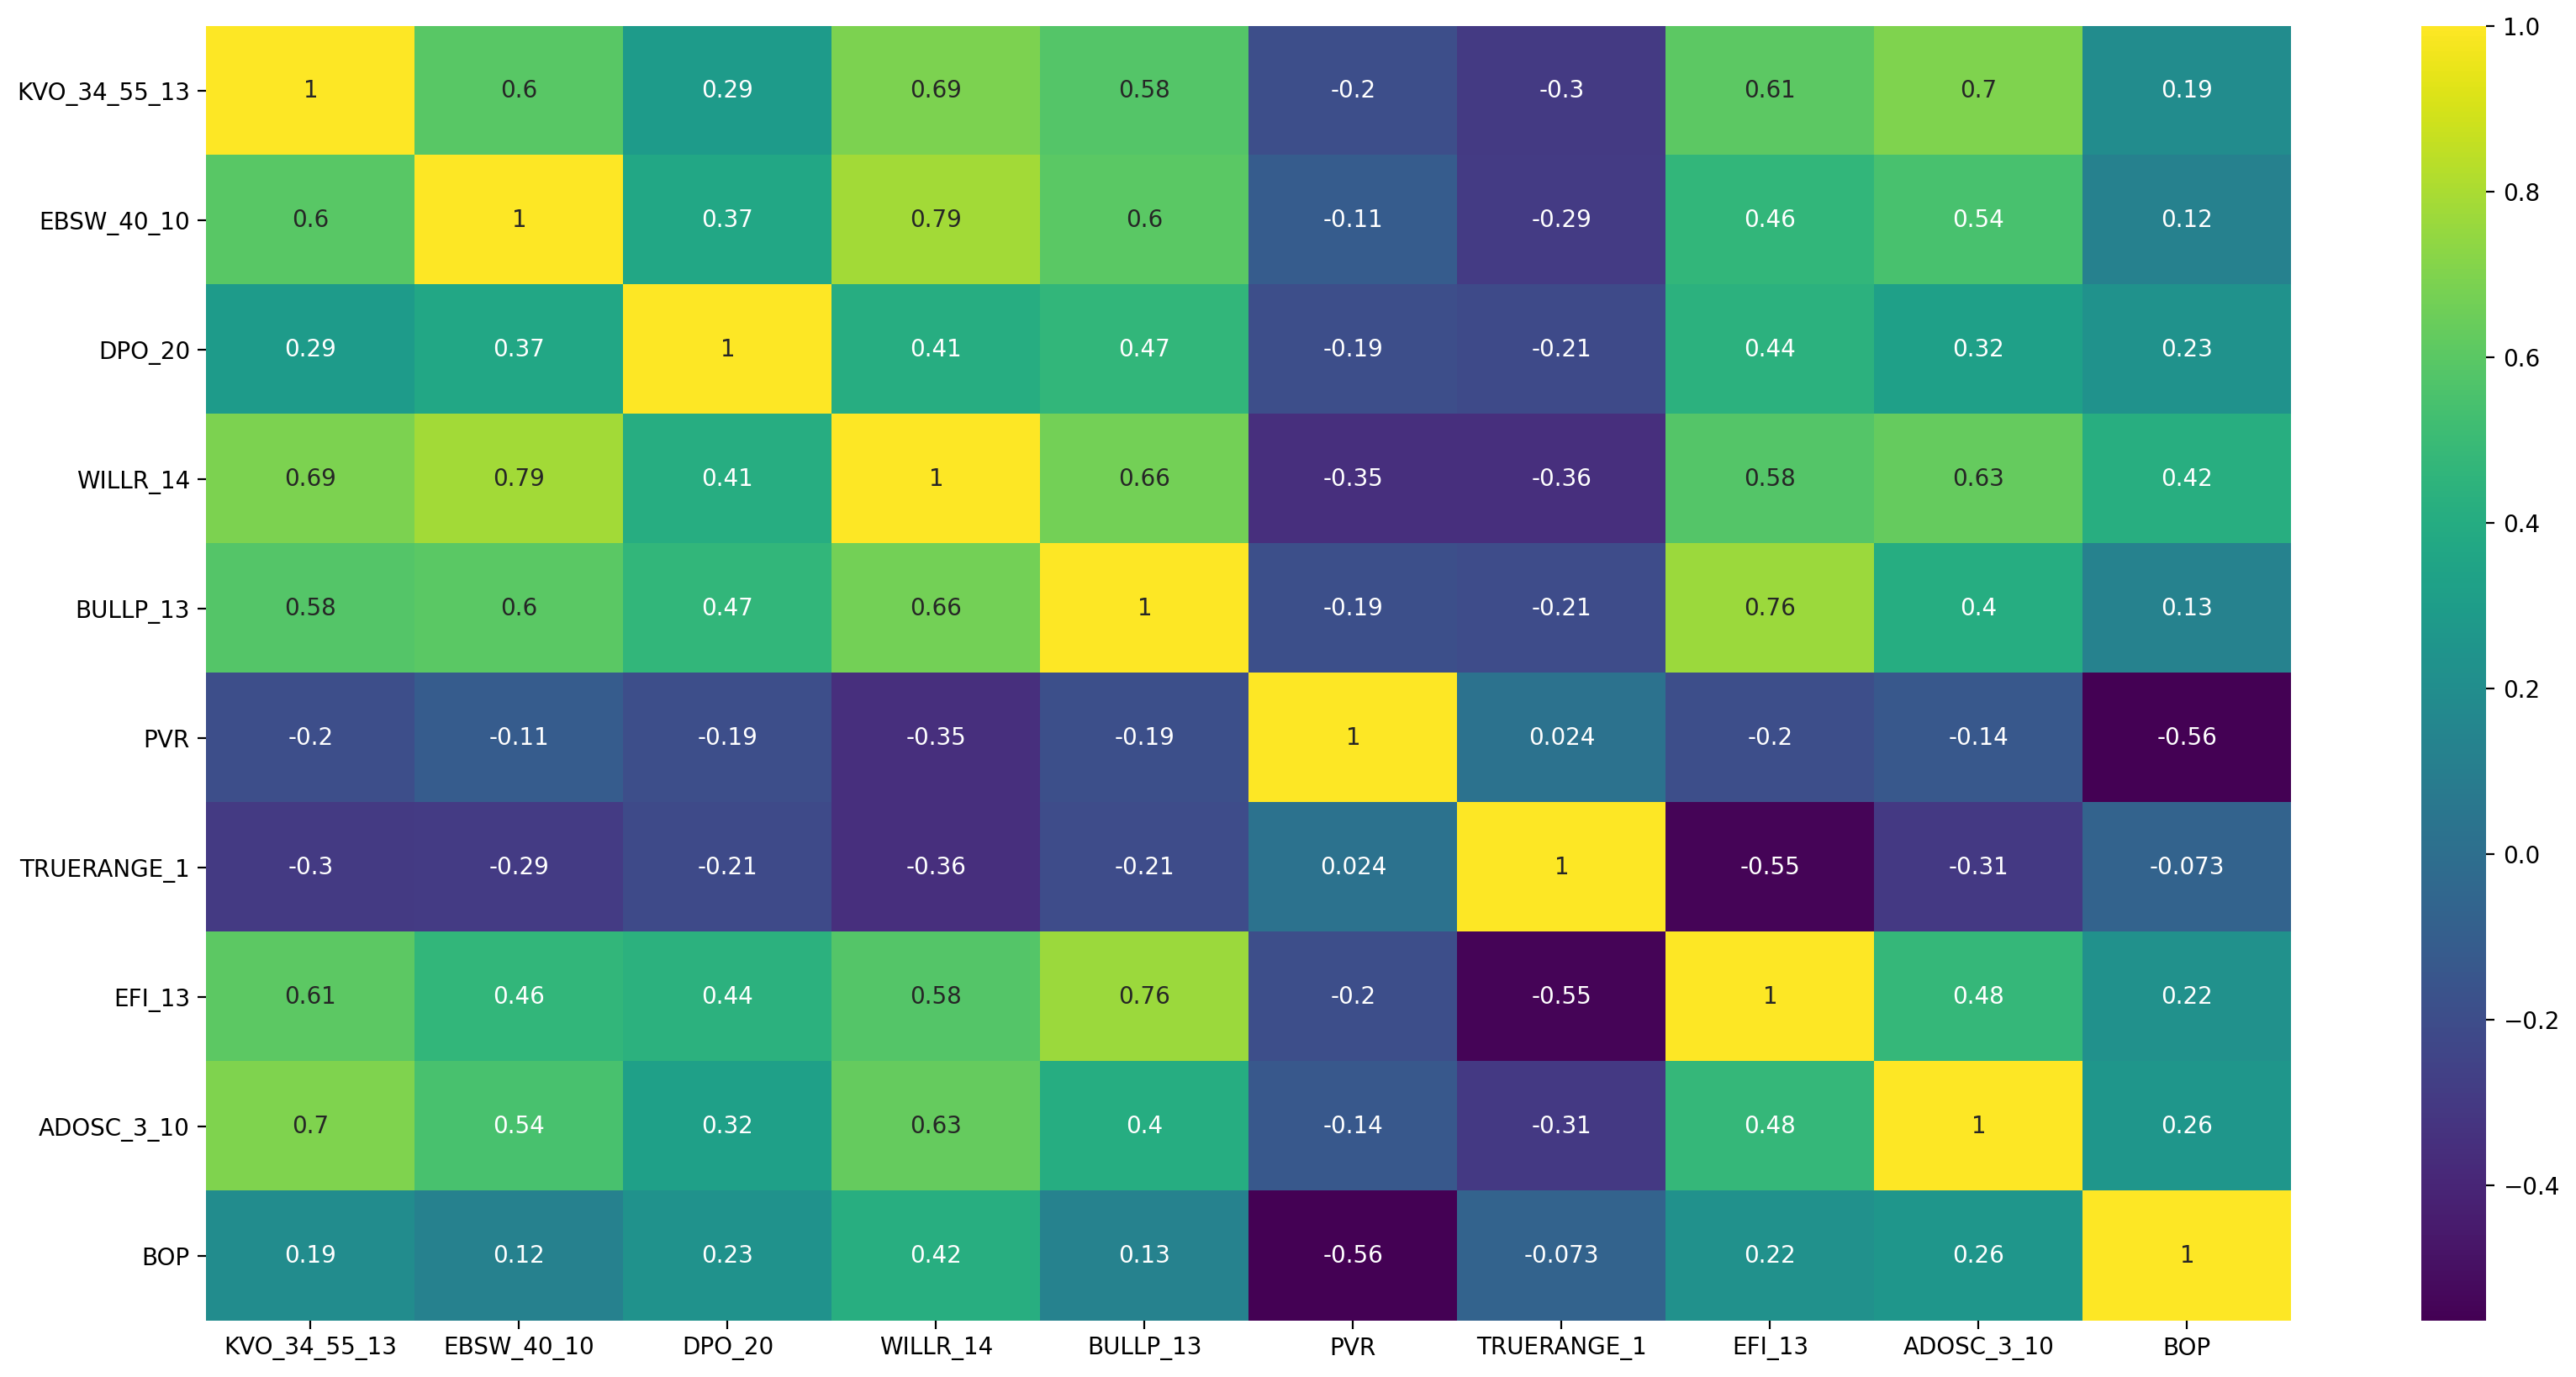

In [53]:
# first, let's compute the corr. matrix among features
corrFeatMatrix = X_selected.corr()

#Plotting of features correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(corrFeatMatrix, cmap="viridis",annot=True)
# plt.title(
#     'Correlation Matrix among features', 
#     fontsize=16, y=1.05, weight='bold'
# )
plt.show()

In [54]:
# setting correlation maximum threshold
rho_max = 0.80

# detecting pairwise features with abs(corr) > rho_max
idxPairwise = np.where(abs(corrFeatMatrix) >= rho_max)
lstPairwise = [
    [corrFeatMatrix.index[x], corrFeatMatrix.columns[y], round(corrFeatMatrix.iloc[x, y], 3)] 
    for x, y in zip(*idxPairwise) if x != y and x < y
]
print("::>> Pairwise features with 𝜌_𝑚𝑎𝑥= +− 0.80 :")
print("::::>>>> List/list represents [Feat1, Feat2, Corr]:")
lstPairwise

::>> Pairwise features with 𝜌_𝑚𝑎𝑥= +− 0.80 :
::::>>>> List/list represents [Feat1, Feat2, Corr]:


[]

## Pair Plot

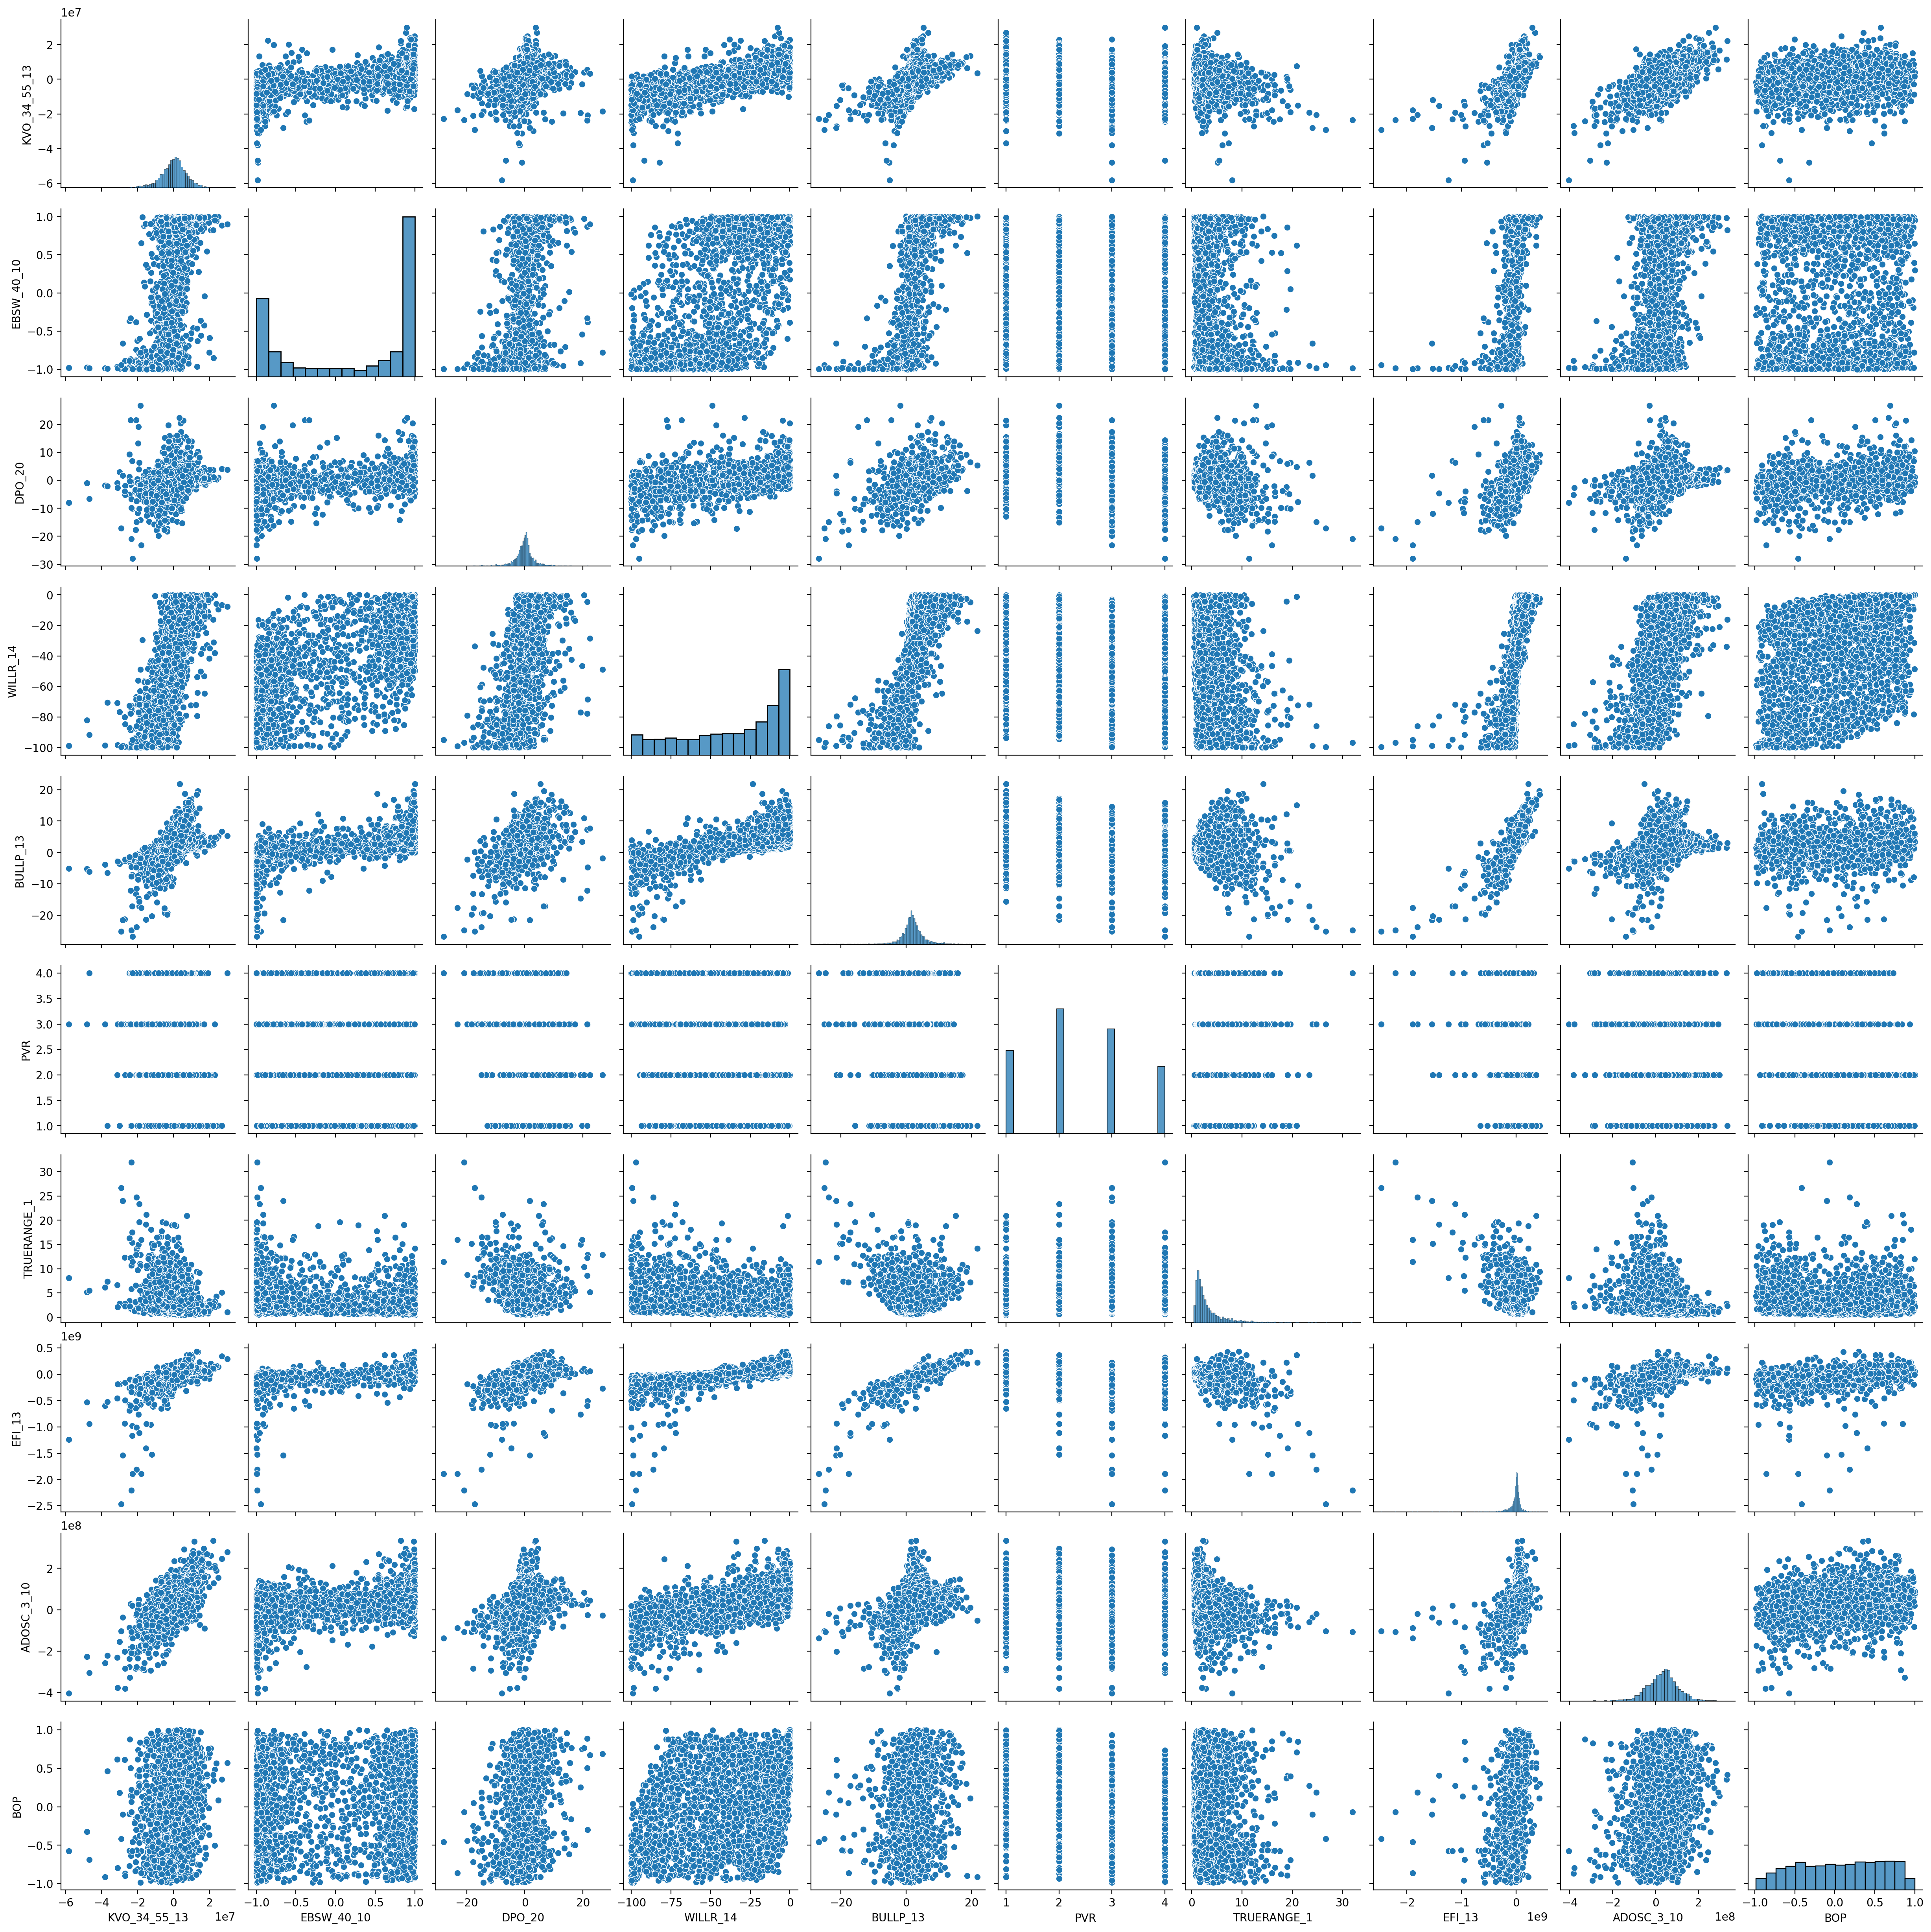

In [55]:
sns.pairplot(X_selected)

## XGBoosting

In [56]:
import shap
def XGBoosting_Filter(X_selected, X_train_f, y_train_f, X_test, y_test):
    # Scale and fit the classifier model
    xgbcls =  XGBClassifier(verbosity = 0, silent=True, random_state=101)
    xgbcls.fit(X_train_f, y_train_f)
    # Cross-validation
    tscv = TimeSeriesSplit(n_splits=5, gap=1)
    # Hyper parameter optimization
    param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                  'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [0.3, 0.4, 0.5 , 0.7]}
    # perform random search
    svm_rdm = RandomizedSearchCV(xgbcls, param_grid, n_iter=100, scoring='f1', cv=tscv, verbose=0)
    svm_rdm.fit(X_train_f, y_train_f, verbose=0)
    
    # print best parameter after tuning 
    print("---------------------------------------------------------")
    print(svm_rdm.best_params_)
    # print best score after tuning 
    print("---------------------------------------------------------")
    print(svm_rdm.best_score_)
    print("---------------------------------------------------------")
    
    # Refit the XGB Classifier with the best params
    cls_best = XGBClassifier(**svm_rdm.best_params_) 

    cls_best.fit(X_train_f, y_train_f, 
            eval_set=[(X_train_f, y_train_f), (X_test, y_test)],
            eval_metric='logloss',
            verbose=True)
    # Plot feature importance
    # feature importance_type = 'gain'

    fig, ax = plt.subplots(figsize=(8, 6))
    feature_imp = pd.DataFrame({'Importance Score': cls_best.feature_importances_,
                               'Features': X_selected.columns}).sort_values(by='Importance Score', ascending=False)

    sns.barplot(x=feature_imp['Importance Score'], y=feature_imp['Features'])
    ax.set_title('Features Importance')
    plt.show()
    
    plot_importance(cls_best, importance_type='gain', show_values=False)
    plt.show()
    
    # SHAP
    explainer = shap.TreeExplainer(cls_best)
    shap_values = explainer.shap_values(X_test)
    # future importance summary
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    # interpretation plot
    shap.summary_plot(shap_values, X_test)

## Spliting

In [57]:
# Always keep shuffle = False for financial time series
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=False)

# convert to array
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test) 

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 2029, 870


In [58]:
# We scale the data so hasten the LSTM's conversion
scaler = MinMaxScaler() 

# Shuffle is set to False because it is a timeseries, and the order matters.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size = 0.30, 
                                                    random_state=0, shuffle = False)

# Scaling
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

---------------------------------------------------------
{'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.7}
---------------------------------------------------------
0.9203230102808355
---------------------------------------------------------
[0]	validation_0-logloss:0.65658	validation_1-logloss:0.65313
[1]	validation_0-logloss:0.62371	validation_1-logloss:0.61790
[2]	validation_0-logloss:0.59356	validation_1-logloss:0.58371
[3]	validation_0-logloss:0.57690	validation_1-logloss:0.56552
[4]	validation_0-logloss:0.55099	validation_1-logloss:0.53792
[5]	validation_0-logloss:0.53706	validation_1-logloss:0.52351
[6]	validation_0-logloss:0.51411	validation_1-logloss:0.49722
[7]	validation_0-logloss:0.50220	validation_1-logloss:0.48437
[8]	validation_0-logloss:0.49523	validation_1-logloss:0.47644
[9]	validation_0-logloss:0.47544	validation_1-logloss:0.45377
[10]	validation_0-logloss:0.45714	validation_1-logloss:0.43338
[11]	validation_0-logl

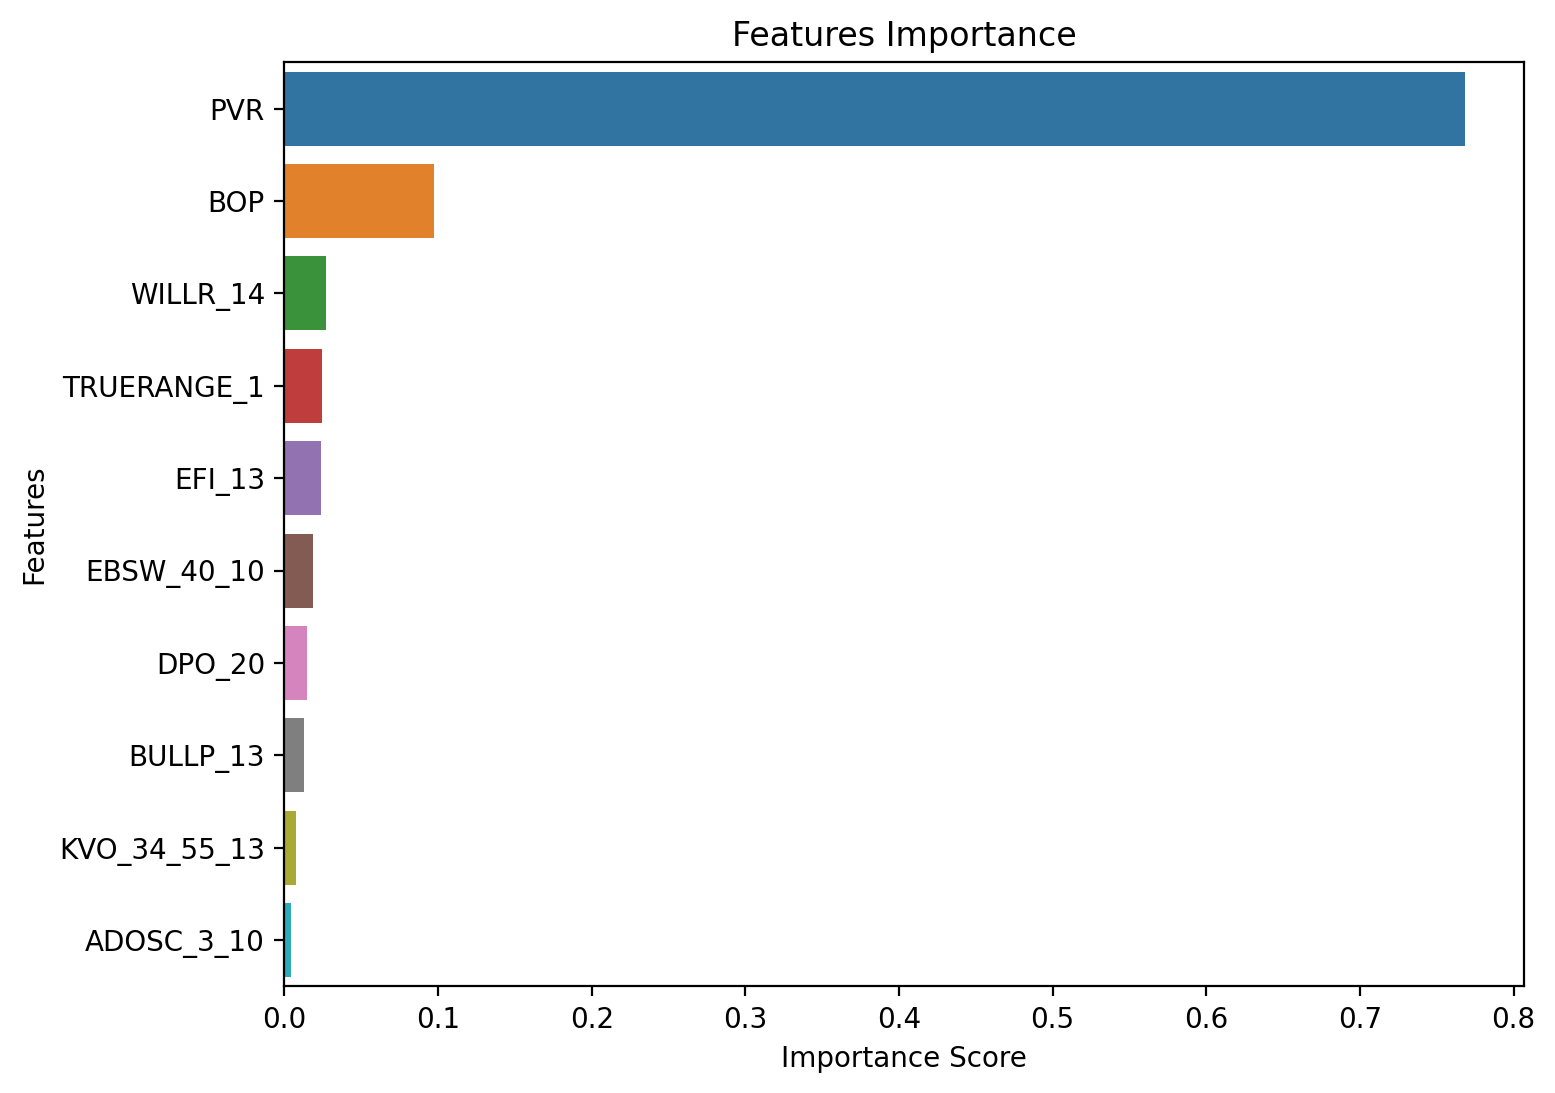

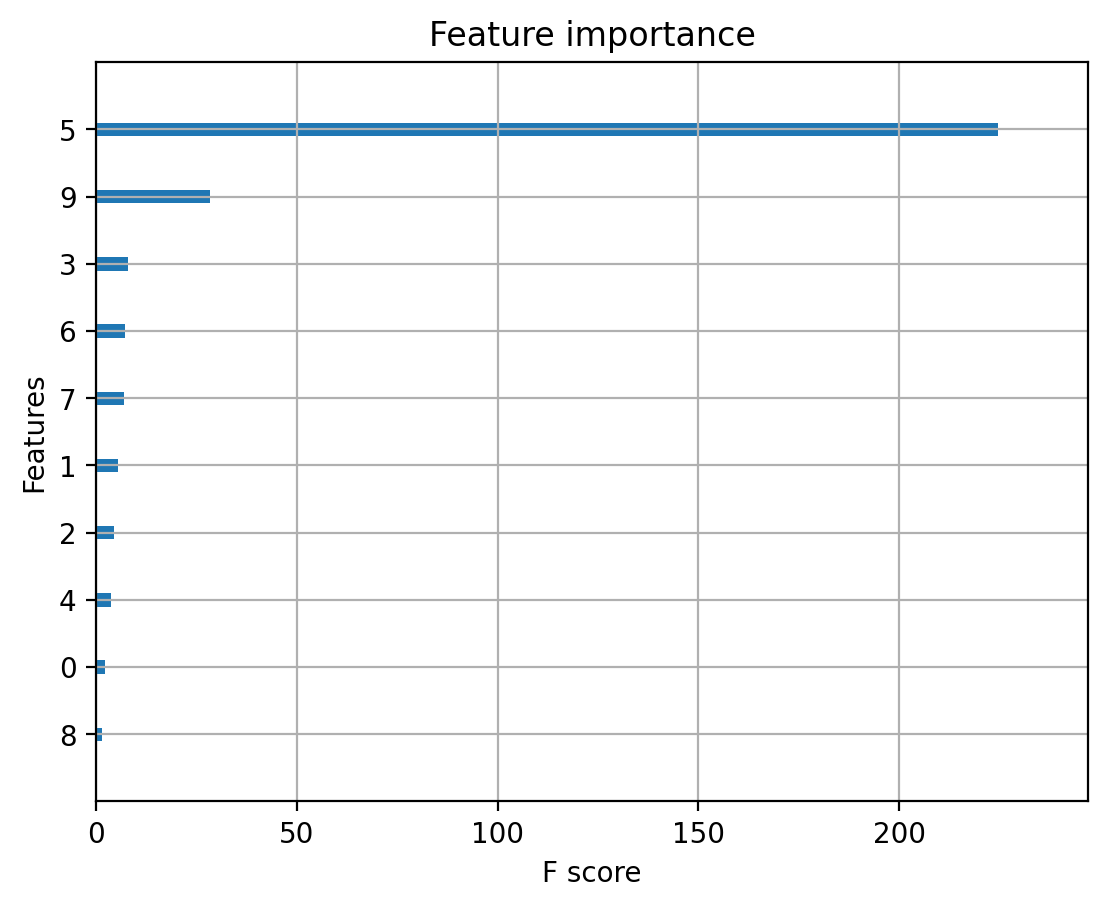

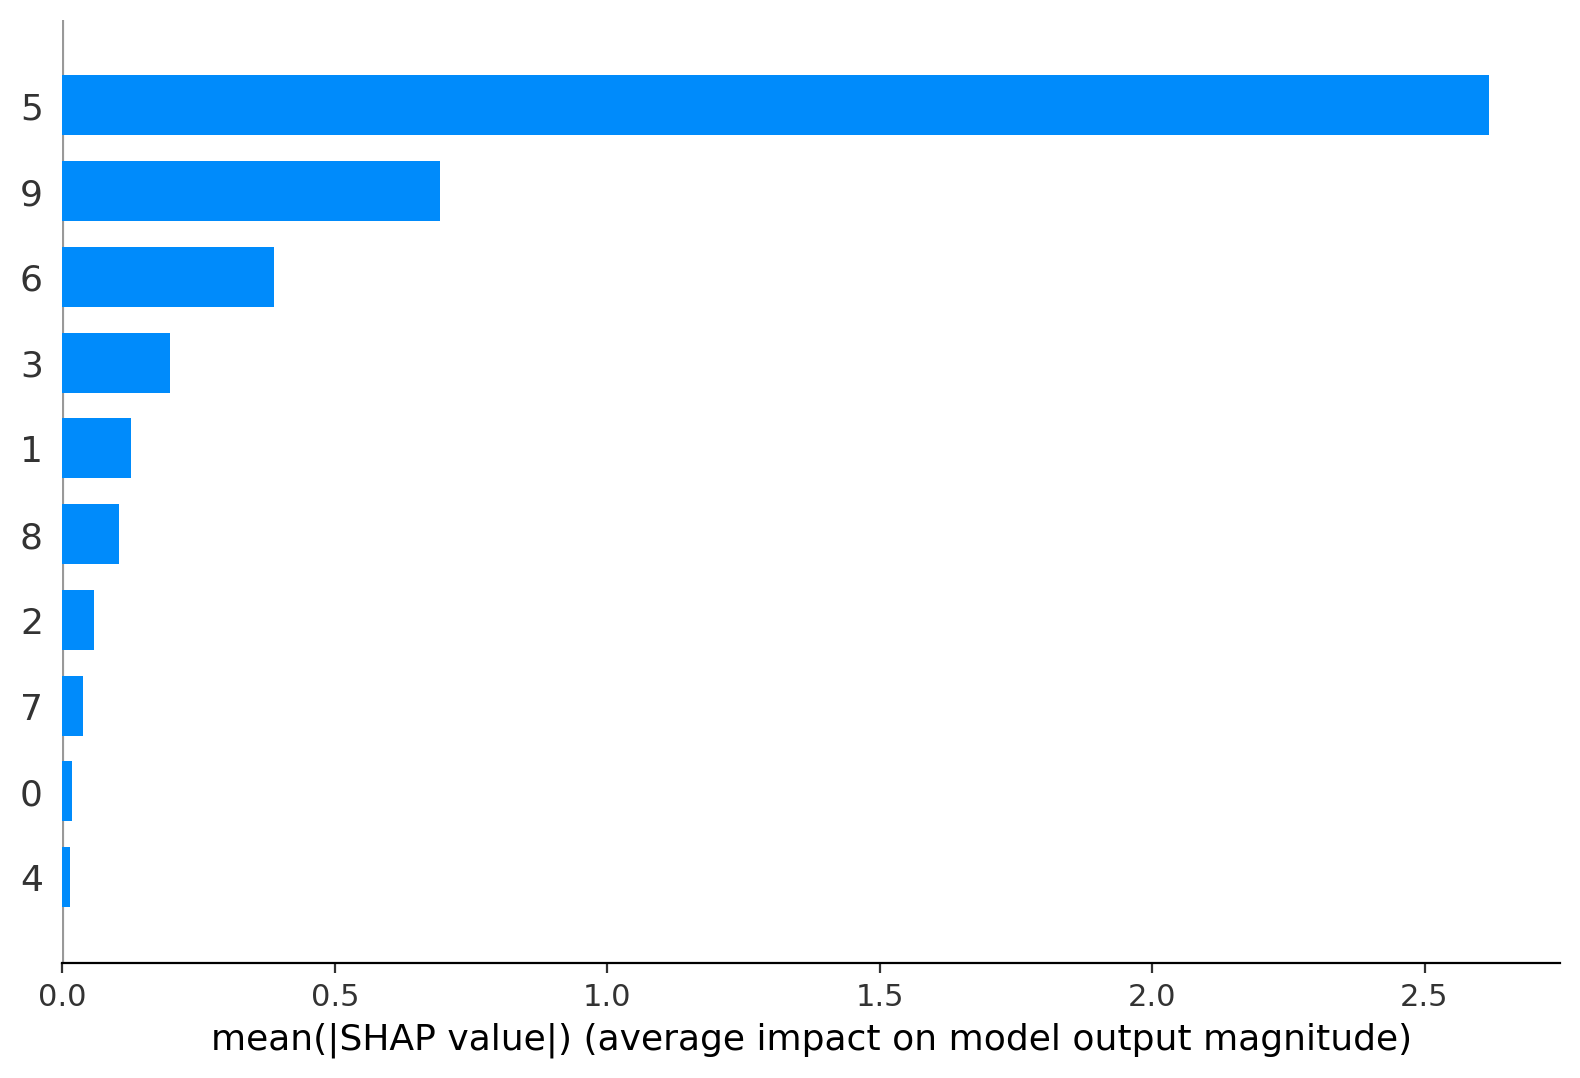

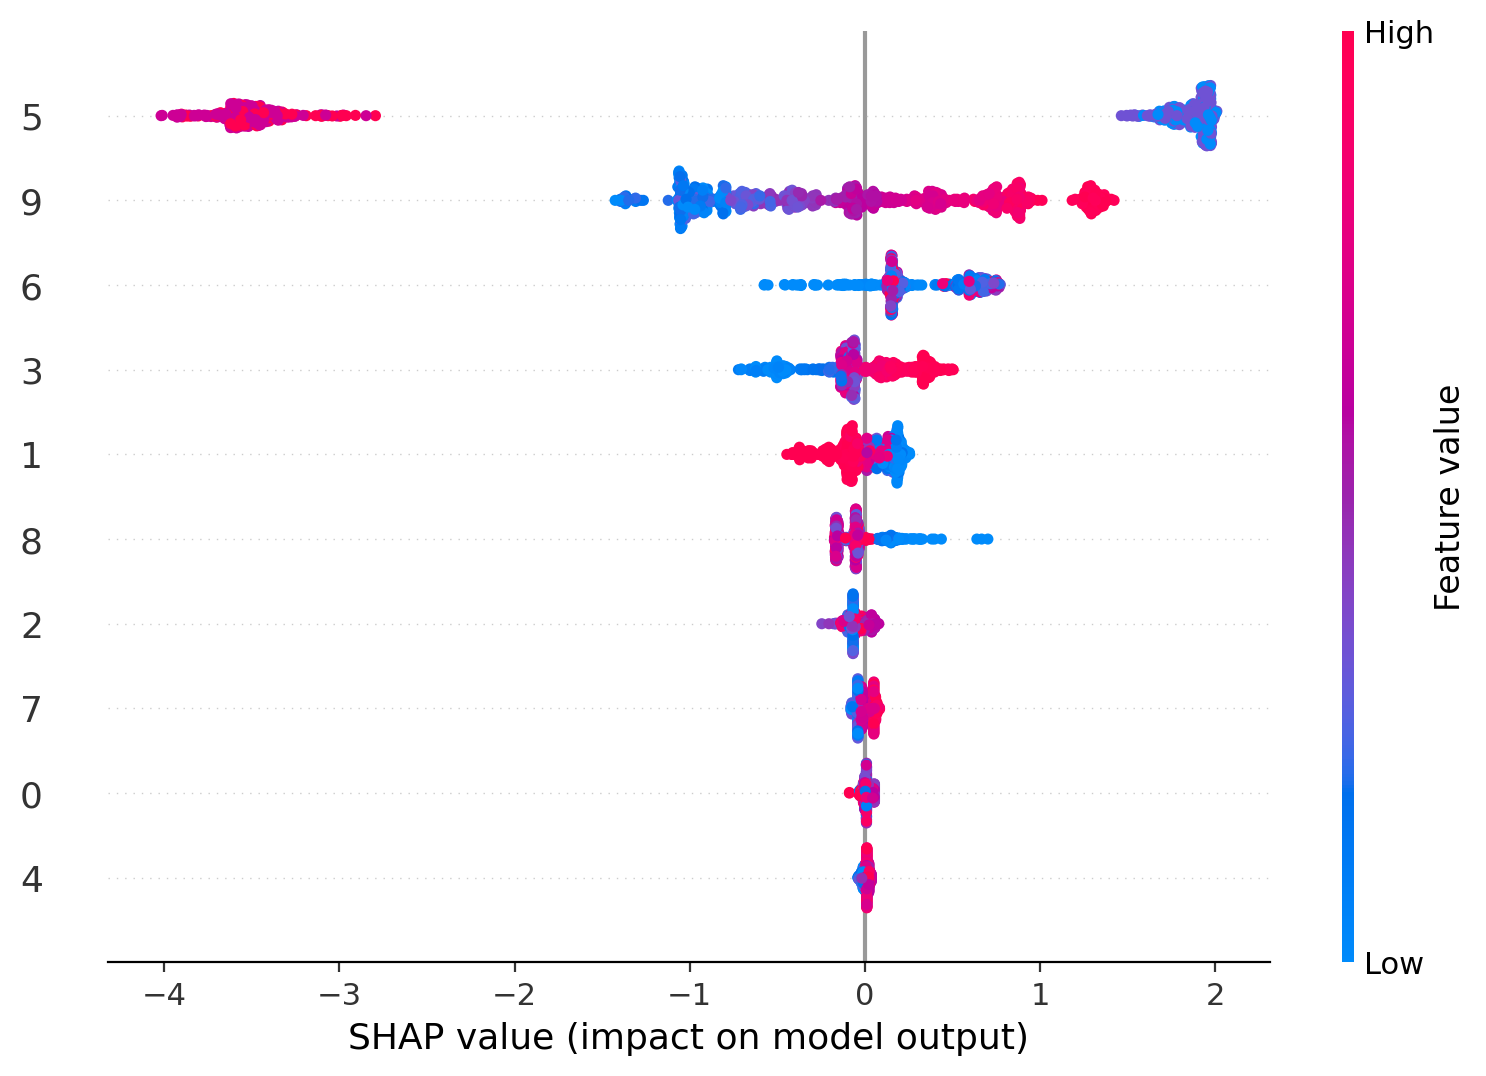

In [59]:
set_seeds(2023)
X_scaled_train_df = pd.DataFrame(X_scaled_train)
X_scaled_test_df = pd.DataFrame(X_scaled_test)
XGBoosting_Filter(X_selected, X_scaled_train_df, y_train, 
                  X_scaled_test_df, y_test)

# LSTM Model

In [60]:
# sequence length
seqlen = 60

# number of features
numfeat = X_scaled_train.shape[1]

In [61]:
g = TimeseriesGenerator(X_scaled_train, y_train.to_numpy(), length=seqlen)
g_ = TimeseriesGenerator(X_scaled_test, y_test.to_numpy(), length=seqlen)

## Model 1 LSTM Model

In [62]:
# Create a model
def create_model(hu=256, lookback=60, features=numfeat):

    tensorflow.keras.backend.clear_session()   
    
    # instantiate the model
    model = Sequential()
    model.add(LSTM(units=hu, input_shape=(lookback, features), activation = 'relu', return_sequences=False, name='LSTM'))
    model.add(Dense(units=1, name='Output'))              # can also specify linear activation function 
    
    # specify optimizer separately (preferred method))
    opt = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
#     opt = Adam(lr=0.001, epsilon=1e-08, decay=0.0)       # adam optimizer seems to perform better for a single lstm
    
    # model compilation
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    
    return model

In [63]:
# lstm network
model_1 = create_model(hu=32, lookback=seqlen, features=numfeat)

In [64]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (None, 32)                5504      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


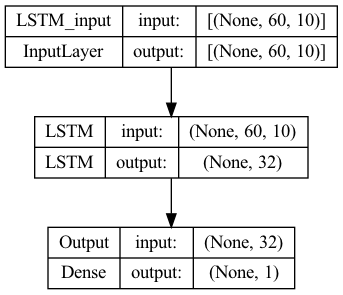

In [65]:
plot_model(model_1, to_file='./img/model_1.png', show_shapes=True, show_layer_names=True)

In [66]:
# Specify callback functions
model_path = (results_path / 'model_1.h5').as_posix()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

my_callbacks = [
    EarlyStopping(patience=10, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath=model_path, verbose=1, monitor='loss', save_best_only=True),
    TensorBoard(log_dir=logdir, histogram_freq=1)
]

In [67]:
# Model fitting
history = model_1.fit(g,
          epochs=500, 
          verbose=1, 
          callbacks=my_callbacks, 
          shuffle=False,
          class_weight=class_weight)

Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 0.3070 - mse: 0.3017
Epoch 1: loss improved from inf to 0.30703, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 2s 41ms/step - loss: 0.3070 - mse: 0.3017
Epoch 2/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2525 - mse: 0.2520
Epoch 2: loss improved from 0.30703 to 0.25200, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 19ms/step - loss: 0.2520 - mse: 0.2517
Epoch 3/500
16/16 [==============================] - ETA: 0s - loss: 0.2505 - mse: 0.2503
Epoch 3: loss improved from 0.25200 to 0.25053, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 19ms/step - loss: 0.2505 - mse: 0.2503
Epoch 4/500
16/16 [==============================] - ETA: 0s - loss: 0.2497 - mse: 0.2495
Epoch 4: loss improved from 0.25053 to 0.24972, saving model to results/lstm_time_series/model_

13/16 [=======================>......] - ETA: 0s - loss: 0.2407 - mse: 0.2403
Epoch 31: loss improved from 0.23799 to 0.23777, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 17ms/step - loss: 0.2378 - mse: 0.2376
Epoch 32/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2404 - mse: 0.2400
Epoch 32: loss improved from 0.23777 to 0.23750, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 17ms/step - loss: 0.2375 - mse: 0.2373
Epoch 33/500
16/16 [==============================] - ETA: 0s - loss: 0.2372 - mse: 0.2370
Epoch 33: loss improved from 0.23750 to 0.23720, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 18ms/step - loss: 0.2372 - mse: 0.2370
Epoch 34/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2399 - mse: 0.2395
Epoch 34: loss improved from 0.23720 to 0.23691, saving model to results/lstm_time_series/model_1

Epoch 61/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2331 - mse: 0.2326
Epoch 61: loss improved from 0.23033 to 0.22994, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 17ms/step - loss: 0.2299 - mse: 0.2297
Epoch 62/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2329 - mse: 0.2324
Epoch 62: loss improved from 0.22994 to 0.22962, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 17ms/step - loss: 0.2296 - mse: 0.2294
Epoch 63/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2325 - mse: 0.2320
Epoch 63: loss improved from 0.22962 to 0.22929, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 17ms/step - loss: 0.2293 - mse: 0.2291
Epoch 64/500
16/16 [==============================] - ETA: 0s - loss: 0.2290 - mse: 0.2288
Epoch 64: loss improved from 0.22929 to 0.22903, saving model to results/lstm_time_s

16/16 [==============================] - 0s 17ms/step - loss: 0.2219 - mse: 0.2218
Epoch 93/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2221 - mse: 0.2220
Epoch 93: loss improved from 0.22195 to 0.22154, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 19ms/step - loss: 0.2215 - mse: 0.2214
Epoch 94/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2221 - mse: 0.2222
Epoch 94: loss did not improve from 0.22154
16/16 [==============================] - 0s 18ms/step - loss: 0.2216 - mse: 0.2216
Epoch 95/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2257 - mse: 0.2253
Epoch 95: loss did not improve from 0.22154
16/16 [==============================] - 0s 17ms/step - loss: 0.2215 - mse: 0.2214
Epoch 96/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2252 - mse: 0.2249
Epoch 96: loss improved from 0.22154 to 0.22111, saving model to results/lstm_time_series/model_1.h5
16/16 [=======

16/16 [==============================] - 0s 17ms/step - loss: 0.2168 - mse: 0.2167
Epoch 127/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2207 - mse: 0.2205
Epoch 127: loss did not improve from 0.21619
16/16 [==============================] - 0s 16ms/step - loss: 0.2168 - mse: 0.2167
Epoch 128/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2200 - mse: 0.2198
Epoch 128: loss did not improve from 0.21619
16/16 [==============================] - 0s 16ms/step - loss: 0.2163 - mse: 0.2163
Epoch 129/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2168 - mse: 0.2168
Epoch 129: loss did not improve from 0.21619
16/16 [==============================] - 0s 17ms/step - loss: 0.2163 - mse: 0.2162
Epoch 130/500
13/16 [=======================>......] - ETA: 0s - loss: 0.2197 - mse: 0.2194
Epoch 130: loss improved from 0.21619 to 0.21614, saving model to results/lstm_time_series/model_1.h5
16/16 [==============================] - 0s 18ms/step - loss: 0

In [68]:
ypred_1 = np.where(model_1.predict(g_, verbose=False) > 0.5, 1, 0)

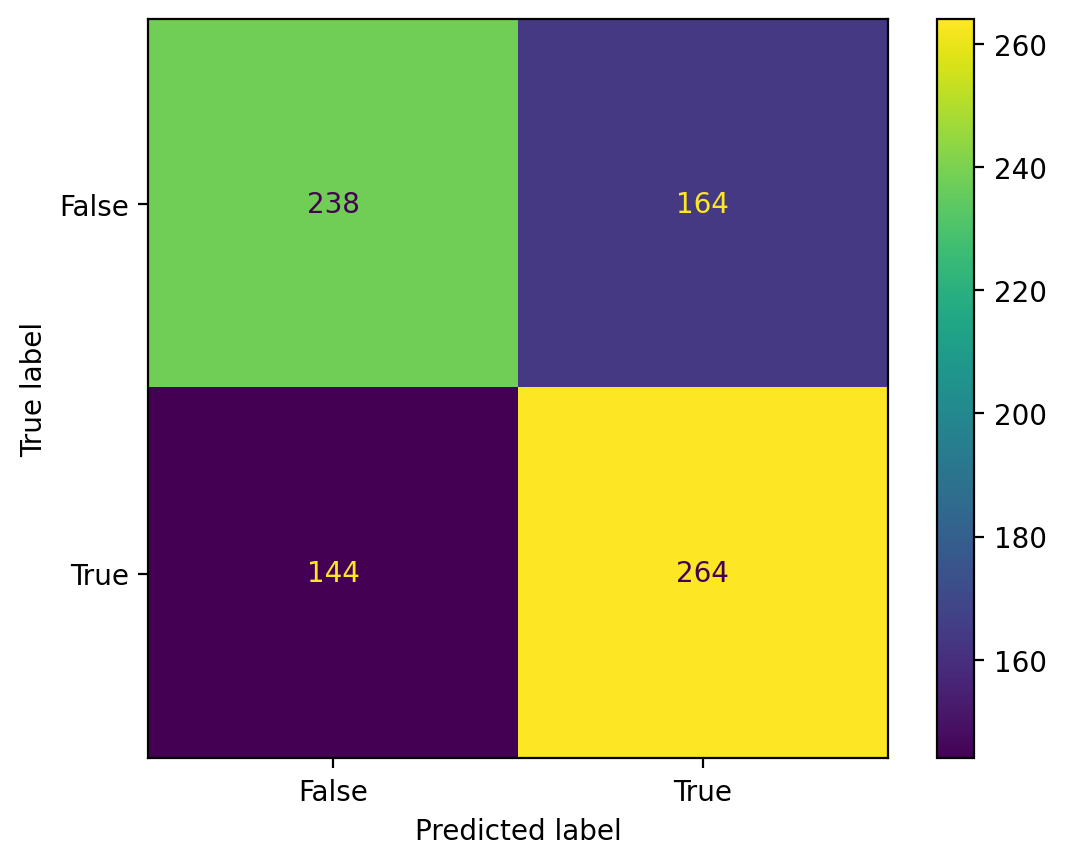

In [69]:
confusion_matrix = metrics.confusion_matrix(y_test[seqlen:], ypred_1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

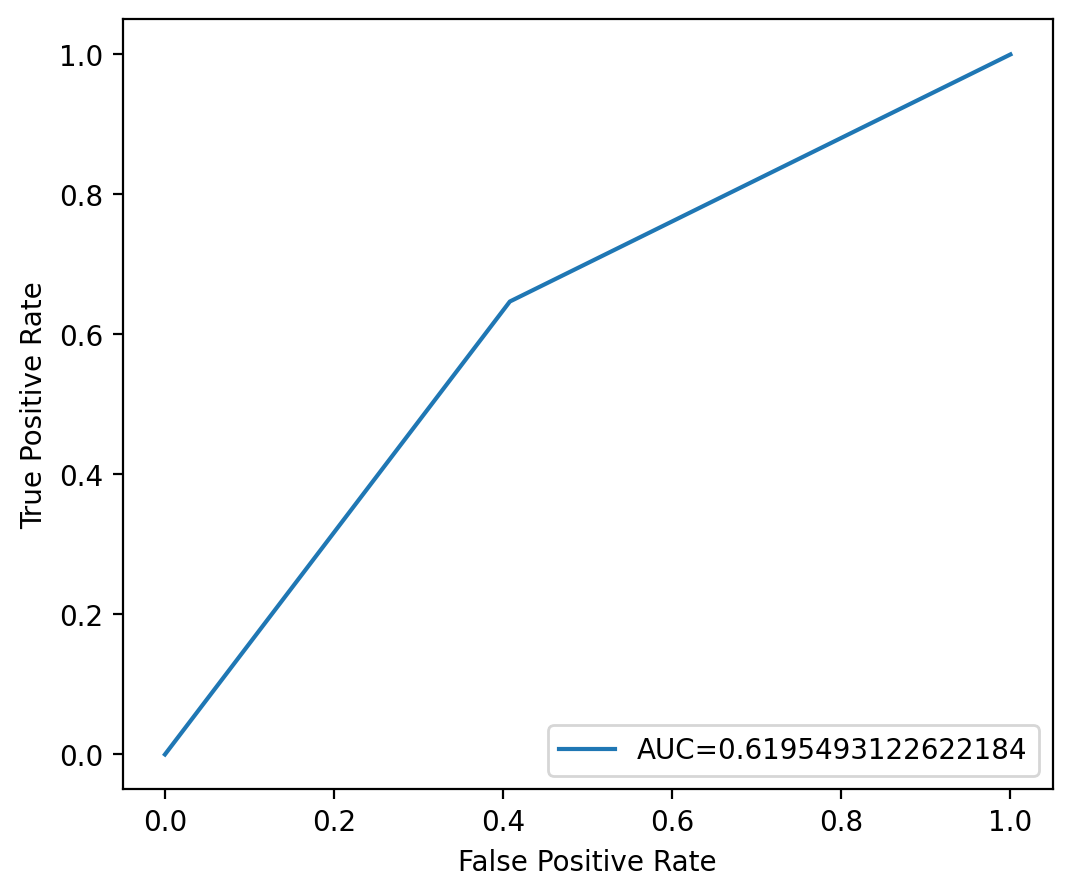

In [70]:
fpr, tpr, _ = metrics.roc_curve(y_test[seqlen:],  ypred_1)
auc = metrics.roc_auc_score(y_test[seqlen:], ypred_1)

#create ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [71]:
print(classification_report(y_test[seqlen:], ypred_1))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       402
           1       0.62      0.65      0.63       408

    accuracy                           0.62       810
   macro avg       0.62      0.62      0.62       810
weighted avg       0.62      0.62      0.62       810



In [72]:
%tensorboard --logdir ./tensorboard/bologs

Reusing TensorBoard on port 6006 (pid 4282), started 1 day, 23:03:04 ago. (Use '!kill 4282' to kill it.)

## Model 2 Stacked-LSTM Model

gelu + relu + tanh

In [73]:
# Create a model
def create_model(hu=256, lookback=60, features=numfeat):

    tensorflow.keras.backend.clear_session()   
    
    # instantiate the model
    model = Sequential()
    model.add(LSTM(units=hu, input_shape=(lookback, features), activation = 'relu', return_sequences=True, name='LSTM1'))
    model.add(Dropout(0.4, name='Dropout1'))
    
    model.add(LSTM(units=hu, activation = 'gelu', return_sequences=True, name='LSTM2'))
    model.add(Dropout(0.4, name='Drouput2'))
    
    model.add(LSTM(units=hu, activation = 'selu', return_sequences=False, name='LSTM3'))    
    model.add(Dense(units=1, activation='sigmoid', name='Output'))              # can also specify linear activation function 
    
    # specify optimizer separately (preferred method))
    opt = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
#     opt = Adam(learning_rate=0.001, epsilon=1e-08, decay=0.0)       # adam optimizer seems to perform better for a single lstm
    
    # model compilation
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    
    return model

In [74]:
# lstm network
model_2 = create_model(hu=32, lookback=seqlen, features=numfeat)

In [75]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 60, 32)            5504      
                                                                 
 Dropout1 (Dropout)          (None, 60, 32)            0         
                                                                 
 LSTM2 (LSTM)                (None, 60, 32)            8320      
                                                                 
 Drouput2 (Dropout)          (None, 60, 32)            0         
                                                                 
 LSTM3 (LSTM)                (None, 32)                8320      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 22,177
Trainable params: 22,177
Non-traina

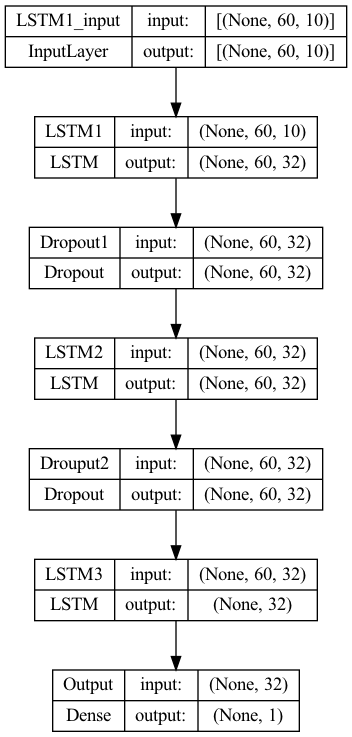

In [76]:
plot_model(model_2, to_file='./img/model_2.png', show_shapes=True, show_layer_names=True)

In [77]:
# Specify callback functions
model_path = (results_path / 'model_2.h5').as_posix()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

my_callbacks = [
    EarlyStopping(patience=10, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath=model_path, verbose=1, monitor='loss', save_best_only=True),
    TensorBoard(log_dir=logdir, histogram_freq=1)
]

In [78]:
# Model fitting
history = model_2.fit(g,
          epochs=500, 
          verbose=1, 
          callbacks=my_callbacks, 
          shuffle=False,
          class_weight=class_weight)

Epoch 1/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2515 - mae: 0.5004
Epoch 1: loss improved from inf to 0.25146, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 4s 72ms/step - loss: 0.2515 - mae: 0.5004
Epoch 2/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2502 - mae: 0.4997
Epoch 2: loss improved from 0.25146 to 0.25012, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 1s 75ms/step - loss: 0.2501 - mae: 0.4997
Epoch 3/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2501 - mae: 0.4998
Epoch 3: loss improved from 0.25012 to 0.25006, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 1s 70ms/step - loss: 0.2501 - mae: 0.4998
Epoch 4/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2504 - mae: 0.4999
Epoch 4: loss did not improve from 0.25006
16/16 [==============================] - 1s 66ms/ste

15/16 [===========================>..] - ETA: 0s - loss: 0.2473 - mae: 0.4950
Epoch 35: loss improved from 0.24774 to 0.24710, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 1s 65ms/step - loss: 0.2471 - mae: 0.4948
Epoch 36/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2482 - mae: 0.4959
Epoch 36: loss did not improve from 0.24710
16/16 [==============================] - 1s 64ms/step - loss: 0.2480 - mae: 0.4958
Epoch 37/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2463 - mae: 0.4939
Epoch 37: loss improved from 0.24710 to 0.24622, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 1s 65ms/step - loss: 0.2462 - mae: 0.4938
Epoch 38/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2479 - mae: 0.4955
Epoch 38: loss did not improve from 0.24622
16/16 [==============================] - 1s 69ms/step - loss: 0.2477 - mae: 0.4953
Epoch 39/500
15/16 [=======

Epoch 69/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2427 - mae: 0.4841
Epoch 69: loss did not improve from 0.23827
16/16 [==============================] - 1s 63ms/step - loss: 0.2423 - mae: 0.4837
Epoch 70/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2396 - mae: 0.4807
Epoch 70: loss did not improve from 0.23827
16/16 [==============================] - 1s 64ms/step - loss: 0.2393 - mae: 0.4801
Epoch 71/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2388 - mae: 0.4797
Epoch 71: loss did not improve from 0.23827
16/16 [==============================] - 1s 65ms/step - loss: 0.2387 - mae: 0.4794
Epoch 72/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2396 - mae: 0.4801
Epoch 72: loss did not improve from 0.23827
16/16 [==============================] - 1s 64ms/step - loss: 0.2391 - mae: 0.4795
Epoch 73/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2397 - mae: 0.4800
Epoch 73: loss did not improve from 0

Epoch 103/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2293 - mae: 0.4609
Epoch 103: loss improved from 0.22974 to 0.22897, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 1s 68ms/step - loss: 0.2290 - mae: 0.4603
Epoch 104/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2292 - mae: 0.4607
Epoch 104: loss improved from 0.22897 to 0.22877, saving model to results/lstm_time_series/model_2.h5
16/16 [==============================] - 1s 70ms/step - loss: 0.2288 - mae: 0.4602
Epoch 105/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2311 - mae: 0.4618
Epoch 105: loss did not improve from 0.22877
16/16 [==============================] - 1s 64ms/step - loss: 0.2305 - mae: 0.4610
Epoch 106/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2293 - mae: 0.4585
Epoch 106: loss did not improve from 0.22877
16/16 [==============================] - 1s 65ms/step - loss: 0.2293 - mae: 0.4583
Epoch 

Epoch 137: early stopping


In [79]:
ypred_2 = np.where(model_2.predict(g_, verbose=False) > 0.5, 1, 0)

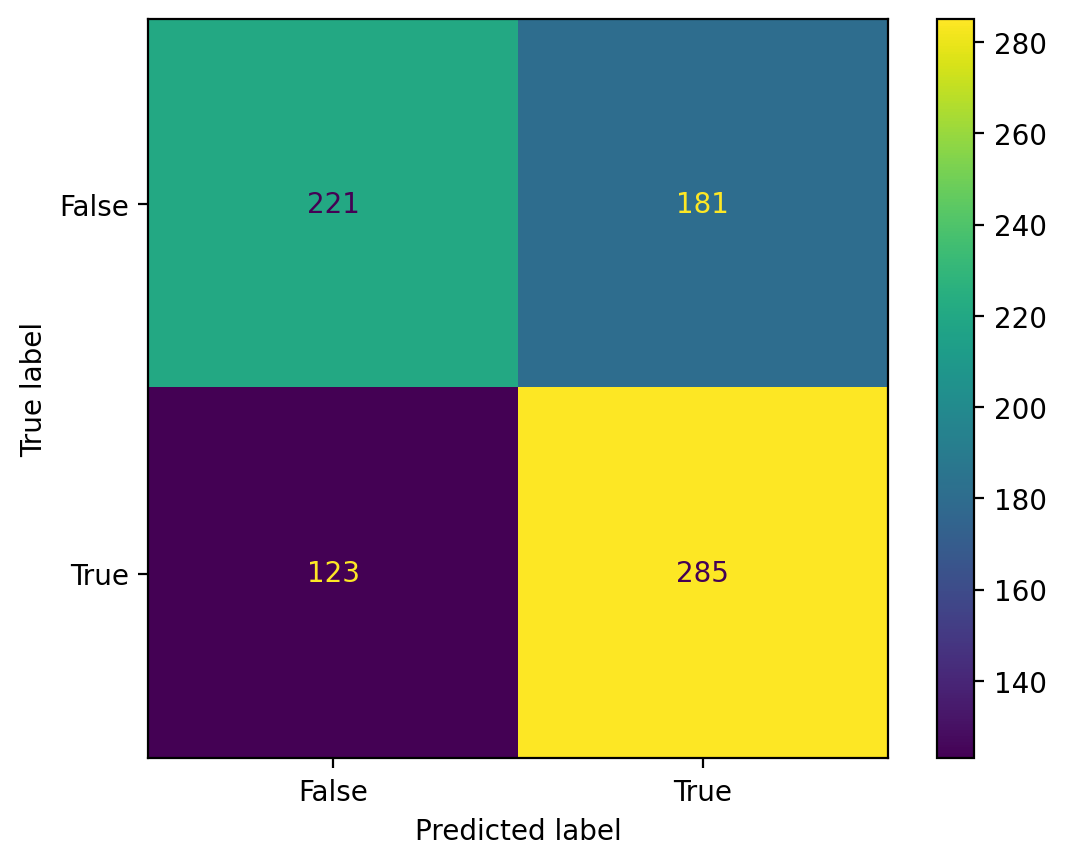

In [80]:
confusion_matrix = metrics.confusion_matrix(y_test[seqlen:], ypred_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

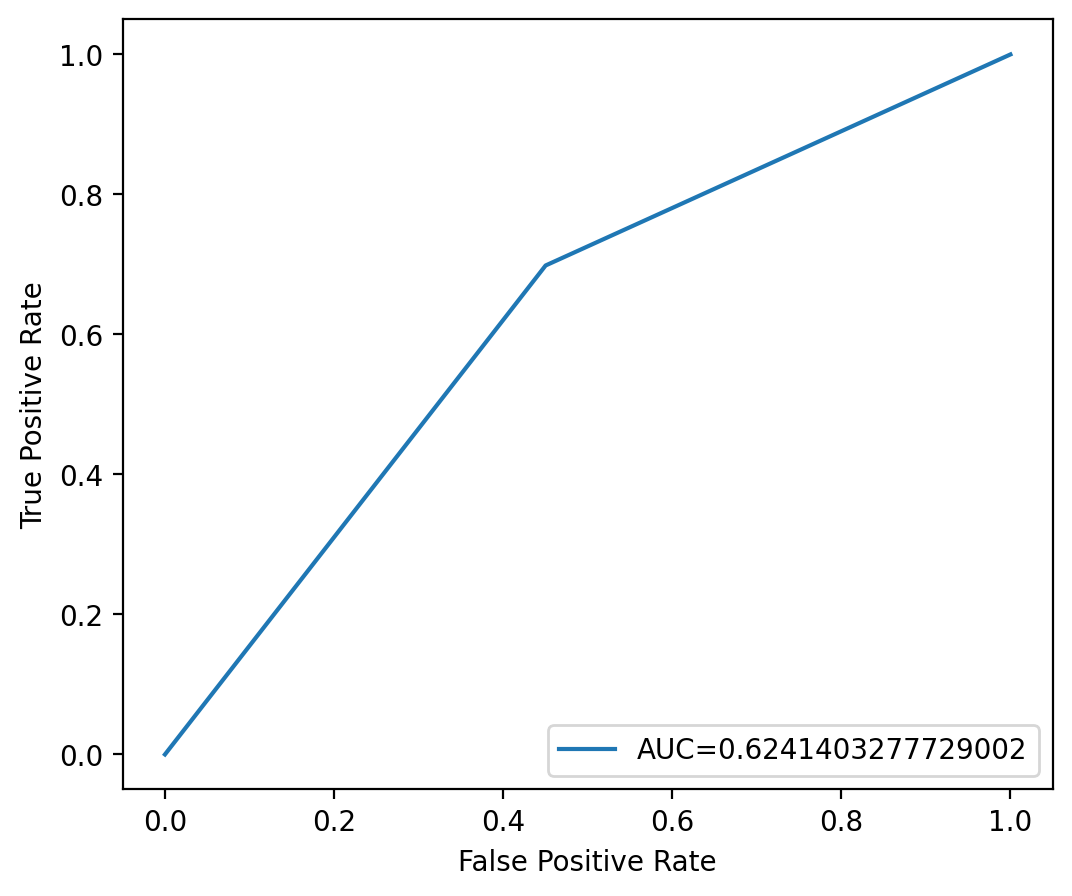

In [81]:
fpr, tpr, _ = metrics.roc_curve(y_test[seqlen:],  ypred_2)
auc = metrics.roc_auc_score(y_test[seqlen:], ypred_2)

#create ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [82]:
print(classification_report(y_test[seqlen:], ypred_2))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       402
           1       0.61      0.70      0.65       408

    accuracy                           0.62       810
   macro avg       0.63      0.62      0.62       810
weighted avg       0.63      0.62      0.62       810



# Hyperparameter Optimization

In [83]:
def build_model(hp):
    
    tf.keras.backend.clear_session()   

    # instantiate the model
    model = Sequential()
    
    # Tune the number of units in the layers
    hp_units1 = hp.Int('units1', min_value=4, max_value=32, step=4)
    hp_units2 = hp.Int('units2', min_value=4, max_value=32, step=4)
    hp_units3 = hp.Int('units3', min_value=4, max_value=32, step=4)
    
    # Tune the dropout rate
    hp_dropout1 = hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)
    hp_dropout2 = hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Tune activation functions
    hp_activation1 = hp.Choice(name = 'activation', values = ['relu', 'gelu', 'elu'], ordered = False)
    hp_activation2 = hp.Choice(name = 'activation', values = ['relu', 'gelu', 'elu'], ordered = False)
    hp_activation3 = hp.Choice(name = 'activation', values = ['relu', 'tanh', 'elu'], ordered = False)
    
    model.add(LSTM(hp_units1, input_shape=(seqlen, numfeat), activation=hp_activation1, return_sequences=True, name='LSTM1'))   
    model.add(Dropout(hp_dropout1, name='Drouput1'))
    
    model.add(LSTM(hp_units2, activation = hp_activation2, return_sequences=True, name='LSTM2'))
    model.add(Dropout(hp_dropout2, name='Drouput2'))

    model.add(LSTM(hp_units3, activation = hp_activation3, return_sequences=False, name='LSTM3'))
    
    model.add(Dense(units=1, activation='sigmoid', name='Output'))    

    # specify optimizer separately (preferred method))
    opt = Adam(learning_rate=hp_learning_rate, epsilon=1e-08)       
    
    # model compilation - 'binary_crossentropy' - 'accuracy' - BinaryAccuracy(name='accuracy', threshold=0.5)
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', 
                           Precision(),
                           Recall()])

    return model

In [84]:
# initialize an early stopping callback to prevent the model from
# overfitting/spending too much time training with minimal gains
callback1 = [EarlyStopping(patience=5, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
             TensorBoard(log_dir="./tensorboard/rslogs")]

callback2 = [EarlyStopping(patience=5, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
             TensorBoard(log_dir="./tensorboard/hblogs")]

callback3 = [EarlyStopping(patience=5, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
             TensorBoard(log_dir="./tensorboard/bologs")]

## Approach 1 : Random Search

In [ ]:
# RandomSearch algorithm from keras tuner
rstuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    directory="./keras",
    project_name="rstrail",
    overwrite=True
)

In [ ]:
# launch tuning process
rstuner.search(g, epochs=50, validation_data=g_, callbacks=callback1, class_weight = class_weight, shuffle=False)

In [ ]:
# display the best hyperparameter values for the model based on the defined objective function
best_rshp = rstuner.get_best_hyperparameters()[0]
print(best_rshp.values)

In [ ]:
# display tuning results summary
rstuner.results_summary()

In [ ]:
%tensorboard --logdir ./tensorboard/rslogs

## Approach 2 : HyperBand

In [ ]:
# HyperBand algorithm from keras tuner
hbtuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=5,
    hyperband_iterations=15,
    directory="./keras",
    project_name="hbtrail",
    overwrite=True
)

In [ ]:
# launch tuning process
hbtuner.search(g, epochs=50, validation_data=g_, callbacks=callback2, class_weight = class_weight, shuffle=False)

In [ ]:
# display the best hyperparameter values for the model based on the defined objective function
best_hbhp = hbtuner.get_best_hyperparameters()[0]
print(best_hbhp.values)

In [ ]:
# display tuning results summary
hbtuner.results_summary()

In [ ]:
%tensorboard --logdir ./tensorboard/hblogs

## Approach 3 : BayesianOptimization

In [85]:
# BayesianOptimization algorithm from keras tuner
botuner = BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=15,
    num_initial_points=2,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    overwrite=True,
    directory="./keras",
    project_name="botrial")

In [86]:
# launch tuning process
botuner.search(g, epochs=50, validation_data=g_, callbacks=callback1, class_weight = class_weight, shuffle=False)

Trial 15 Complete [00h 00m 56s]
val_accuracy: 0.644444465637207

Best val_accuracy So Far: 0.6567901372909546
Total elapsed time: 00h 09m 31s
INFO:tensorflow:Oracle triggered exit


In [87]:
# display the best hyperparameter values for the model based on the defined objective function
best_bohp = botuner.get_best_hyperparameters()[0]
print(best_bohp.values)

{'units1': 32, 'units2': 32, 'units3': 32, 'Dropout_rate': 0.2, 'learning_rate': 0.001, 'activation': 'elu'}


In [88]:
# display tuning results summary
botuner.results_summary()

Results summary
Results in ./keras/botrial
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 32
units2: 32
units3: 32
Dropout_rate: 0.2
learning_rate: 0.001
activation: elu
Score: 0.6567901372909546
Trial summary
Hyperparameters:
units1: 32
units2: 28
units3: 32
Dropout_rate: 0.2
learning_rate: 0.001
activation: elu
Score: 0.644444465637207
Trial summary
Hyperparameters:
units1: 12
units2: 32
units3: 28
Dropout_rate: 0.2
learning_rate: 0.001
activation: elu
Score: 0.6407407522201538
Trial summary
Hyperparameters:
units1: 32
units2: 20
units3: 32
Dropout_rate: 0.1
learning_rate: 0.001
activation: elu
Score: 0.6370370388031006
Trial summary
Hyperparameters:
units1: 4
units2: 28
units3: 16
Dropout_rate: 0.2
learning_rate: 0.001
activation: elu
Score: 0.5962963104248047
Trial summary
Hyperparameters:
units1: 28
units2: 32
units3: 32
Dropout_rate: 0.0
learning_rate: 0.01
activation: elu
Score: 0.5827160477638245
Trial summary
Hyperparameters:
units1: 28
units2: 32
units3: 32
Dro

In [89]:
%tensorboard --logdir ./tensorboard/bologs

Reusing TensorBoard on port 6006 (pid 4282), started 1 day, 23:15:20 ago. (Use '!kill 4282' to kill it.)

# Optimal LSTM

In [90]:
# Create a model
def create_model(hu1=32, hu2=32, hu3=32, lookback=60, features=10):

    tensorflow.keras.backend.clear_session()   
    
    # instantiate the model
    model = Sequential()
    model.add(LSTM(units=hu1, input_shape=(lookback, features), activation = 'elu', return_sequences=True, name='LSTM1'))
    model.add(Dropout(0.2, name='Dropout1'))
    
    model.add(LSTM(units=hu2, activation = 'elu', return_sequences=True, name='LSTM2'))
    model.add(Dropout(0.2, name='Drouput2'))
    
    model.add(LSTM(units=hu3, activation = 'elu', return_sequences=False, name='LSTM3'))    
    model.add(Dense(units=1, activation='sigmoid', name='Output'))              # can also specify linear activation function 
    
    # specify optimizer separately (preferred method))
    opt = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
#     opt = Adam(learning_rate=0.001, epsilon=1e-08, decay=0.0)       # adam optimizer seems to perform better for a single lstm
    
    # model compilation
#     model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', 
                           Precision(),
                           Recall()])
    
    return model

In [91]:
# lstm network
model_3 = create_model(hu1=32, hu2=32, hu3=32, lookback=seqlen, features=numfeat)

In [92]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 60, 32)            5504      
                                                                 
 Dropout1 (Dropout)          (None, 60, 32)            0         
                                                                 
 LSTM2 (LSTM)                (None, 60, 32)            8320      
                                                                 
 Drouput2 (Dropout)          (None, 60, 32)            0         
                                                                 
 LSTM3 (LSTM)                (None, 32)                8320      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 22,177
Trainable params: 22,177
Non-traina

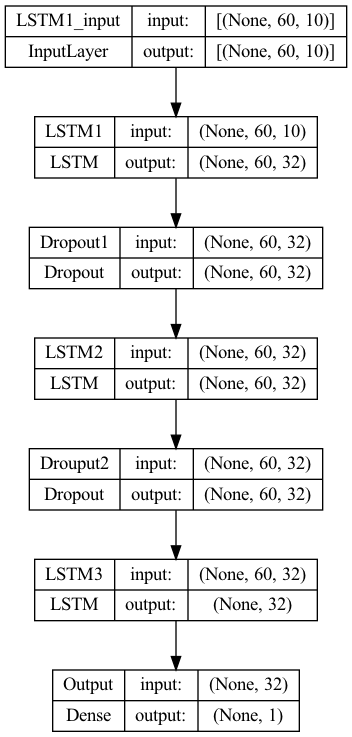

In [93]:
plot_model(model_3, to_file='./img/model_2.png', show_shapes=True, show_layer_names=True)

In [94]:
# Specify callback functions
model_path = (results_path / 'model_3.h5').as_posix()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

my_callbacks = [
    EarlyStopping(patience=10, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath=model_path, verbose=1, monitor='loss', save_best_only=True),
    TensorBoard(log_dir=logdir, histogram_freq=1)
]

In [96]:
random.seed(2023)
# Model fitting
history = model_3.fit(g,
          epochs=500, 
          verbose=1, 
          callbacks=my_callbacks, 
          shuffle=False,
          class_weight=class_weight)

Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 0.6423 - accuracy: 0.6333 - precision: 0.6205 - recall: 0.5887
Epoch 1: loss did not improve from 0.64170
16/16 [==============================] - 1s 62ms/step - loss: 0.6423 - accuracy: 0.6333 - precision: 0.6205 - recall: 0.5887
Epoch 2/500
15/16 [===========================>..] - ETA: 0s - loss: 0.6363 - accuracy: 0.6411 - precision: 0.6286 - recall: 0.6018
Epoch 2: loss improved from 0.64170 to 0.63546, saving model to results/lstm_time_series/model_3.h5
16/16 [==============================] - 1s 63ms/step - loss: 0.6355 - accuracy: 0.6414 - precision: 0.6283 - recall: 0.6015
Epoch 3/500
15/16 [===========================>..] - ETA: 0s - loss: 0.6419 - accuracy: 0.6339 - precision: 0.6171 - recall: 0.6083
Epoch 3: loss did not improve from 0.63546
16/16 [==============================] - 1s 58ms/step - loss: 0.6417 - accuracy: 0.6333 - precision: 0.6171 - recall: 0.6026
Epoch 4/500
15/16 [========================

Epoch 27/500
15/16 [===========================>..] - ETA: 0s - loss: 0.6270 - accuracy: 0.6557 - precision: 0.6362 - recall: 0.6466
Epoch 27: loss did not improve from 0.62110
16/16 [==============================] - 1s 86ms/step - loss: 0.6253 - accuracy: 0.6582 - precision: 0.6389 - recall: 0.6464
Epoch 28/500
15/16 [===========================>..] - ETA: 0s - loss: 0.6342 - accuracy: 0.6406 - precision: 0.6186 - recall: 0.6389
Epoch 28: loss did not improve from 0.62110
16/16 [==============================] - 1s 59ms/step - loss: 0.6321 - accuracy: 0.6425 - precision: 0.6206 - recall: 0.6378
Epoch 29/500
15/16 [===========================>..] - ETA: 0s - loss: 0.6257 - accuracy: 0.6458 - precision: 0.6234 - recall: 0.6466
Epoch 29: loss did not improve from 0.62110
16/16 [==============================] - 1s 72ms/step - loss: 0.6238 - accuracy: 0.6460 - precision: 0.6236 - recall: 0.6442
Epoch 30/500
15/16 [===========================>..] - ETA: 0s - loss: 0.6238 - accuracy: 0.650

In [97]:
ypred_3 = np.where(model_3.predict(g_, verbose=False) > 0.5, 1, 0)

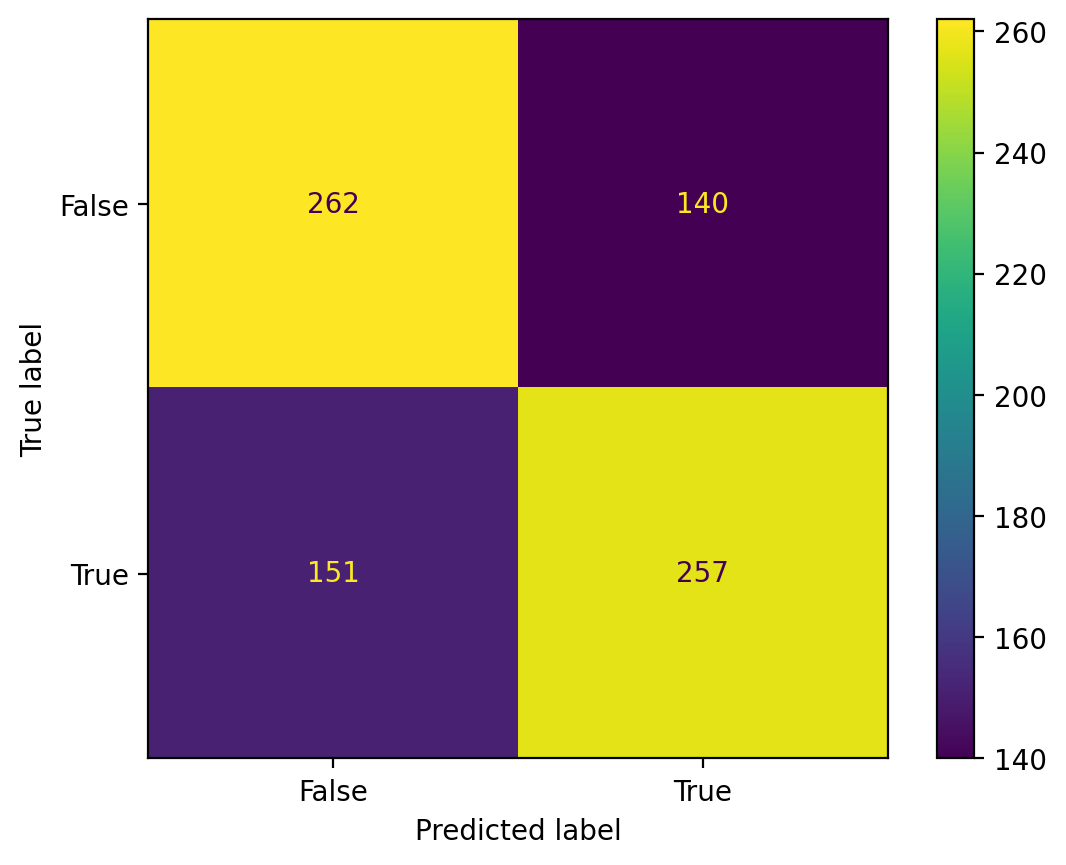

In [98]:
confusion_matrix = metrics.confusion_matrix(y_test[seqlen:], ypred_3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

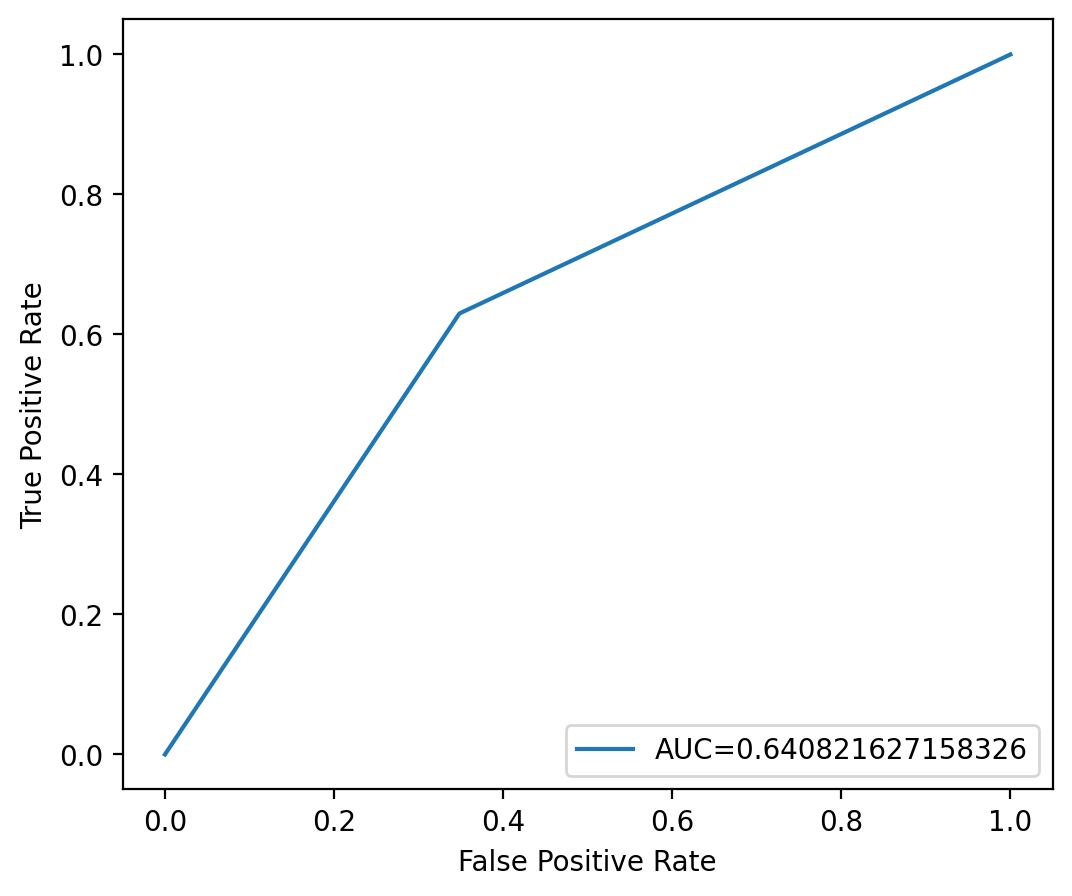

In [99]:
fpr, tpr, _ = metrics.roc_curve(y_test[seqlen:],  ypred_3)
auc = metrics.roc_auc_score(y_test[seqlen:], ypred_3)

#create ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [100]:
print(classification_report(y_test[seqlen:], ypred_3))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       402
           1       0.65      0.63      0.64       408

    accuracy                           0.64       810
   macro avg       0.64      0.64      0.64       810
weighted avg       0.64      0.64      0.64       810



# Trading Strategy

## Long-Only Strategy

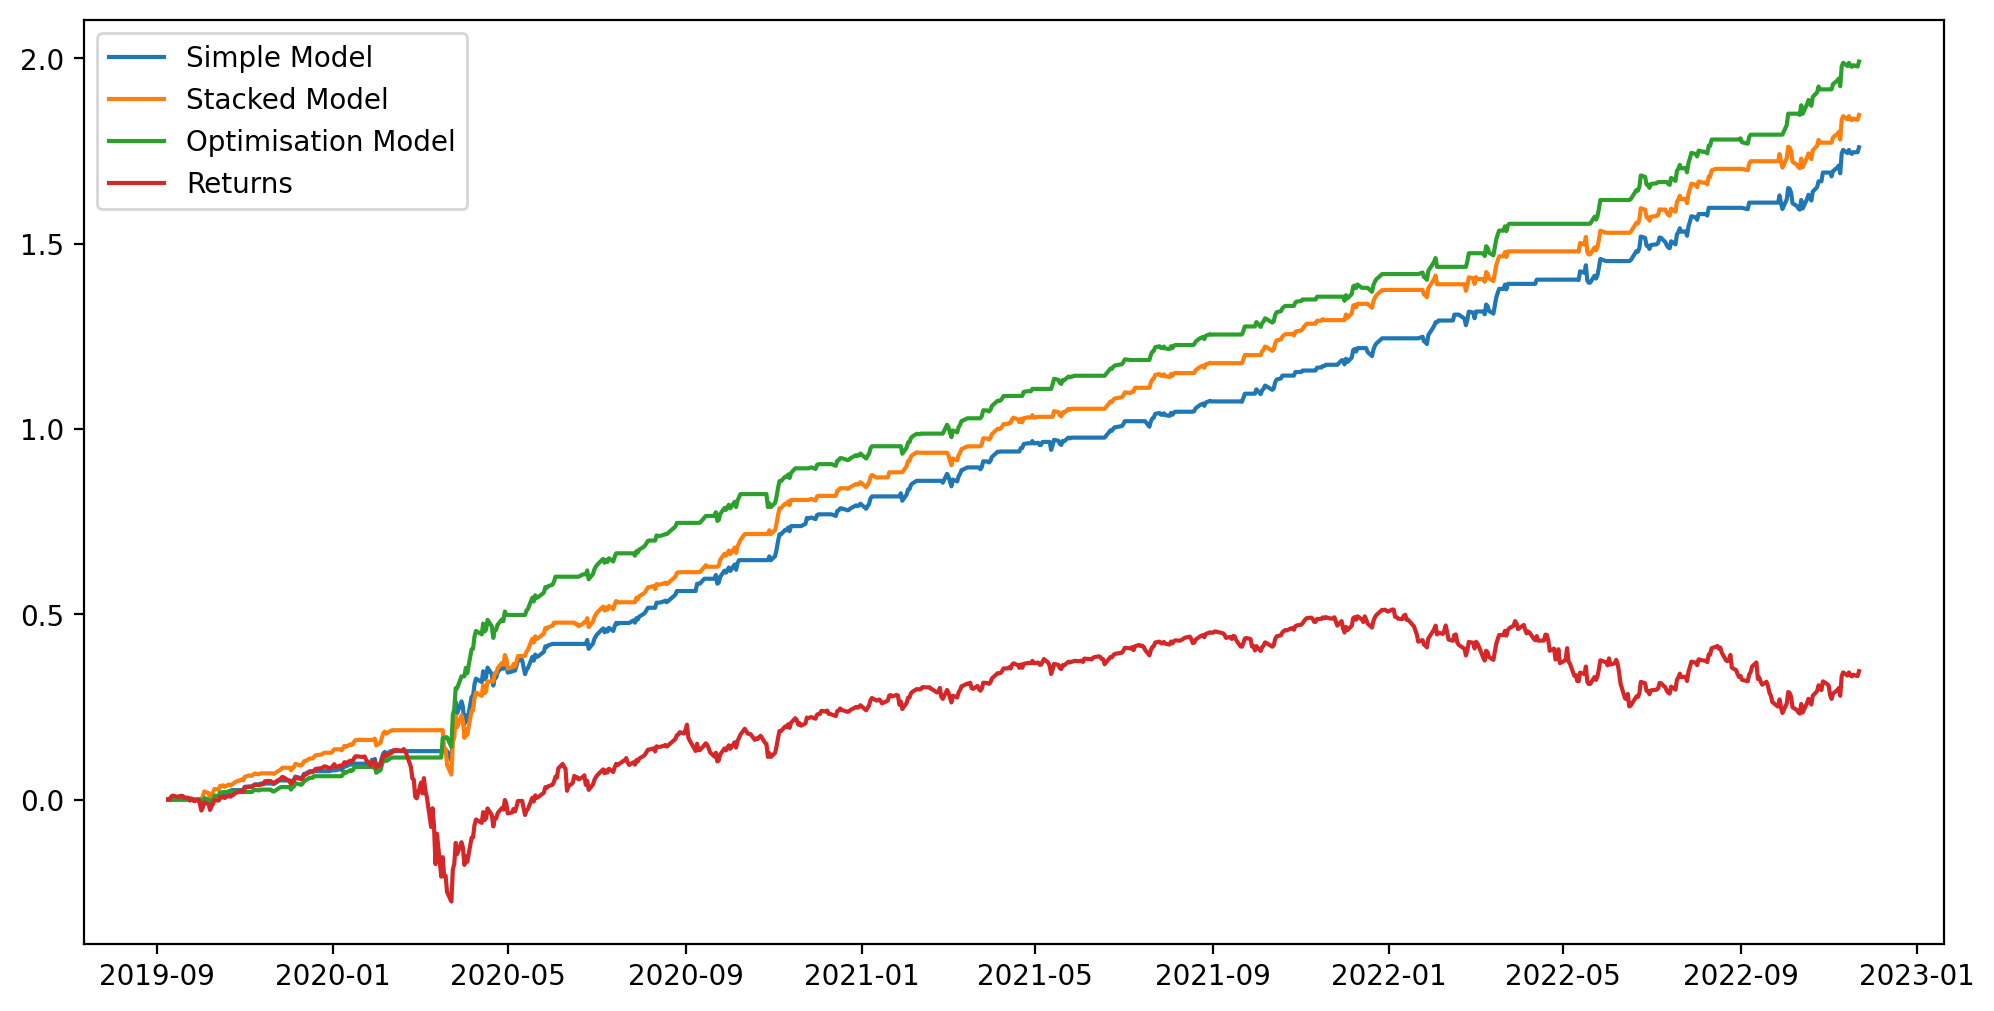

In [101]:
bk_lo = stock_data[['Returns']].loc[X_test.iloc[60:,:].index]
bk_lo['Sign_1'] = ypred_1
bk_lo['Sign_2'] = ypred_2
bk_lo['Sign_3'] = ypred_3
bk_lo['Model_1'] = bk_lo['Returns'] * bk_lo['Sign_1'].fillna(0)
bk_lo['Model_2'] = bk_lo['Returns'] * bk_lo['Sign_2'].fillna(0)
bk_lo['Model_3'] = bk_lo['Returns'] * bk_lo['Sign_3'].fillna(0)

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(bk_lo['Model_1']), label='Simple Model')
plt.plot(np.cumsum(bk_lo['Model_2']), label='Stacked Model')
plt.plot(np.cumsum(bk_lo['Model_3']), label='Optimisation Model')
plt.plot(np.cumsum(bk_lo['Returns']), label='Returns')
plt.legend()
plt.show()

In [102]:
print('Simple LSTM Return:', round(np.cumsum(bk_lo['Model_1'])[-1]*100, 2), '%')
print('Stacked LSTM Return:', round(np.cumsum(bk_lo['Model_2'])[-1]*100, 2), '%')
print('Optimal LSTM Return:', round(np.cumsum(bk_lo['Model_3'])[-1]*100, 2), '%')
print('Holding Return:', round(np.cumsum(bk_lo['Returns'])[-1]*100, 2), '%')

Simple LSTM Return: 176.01 %
Stacked LSTM Return: 184.74 %
Optimal LSTM Return: 199.13 %
Holding Return: 34.67 %


## Long-Short Strategy

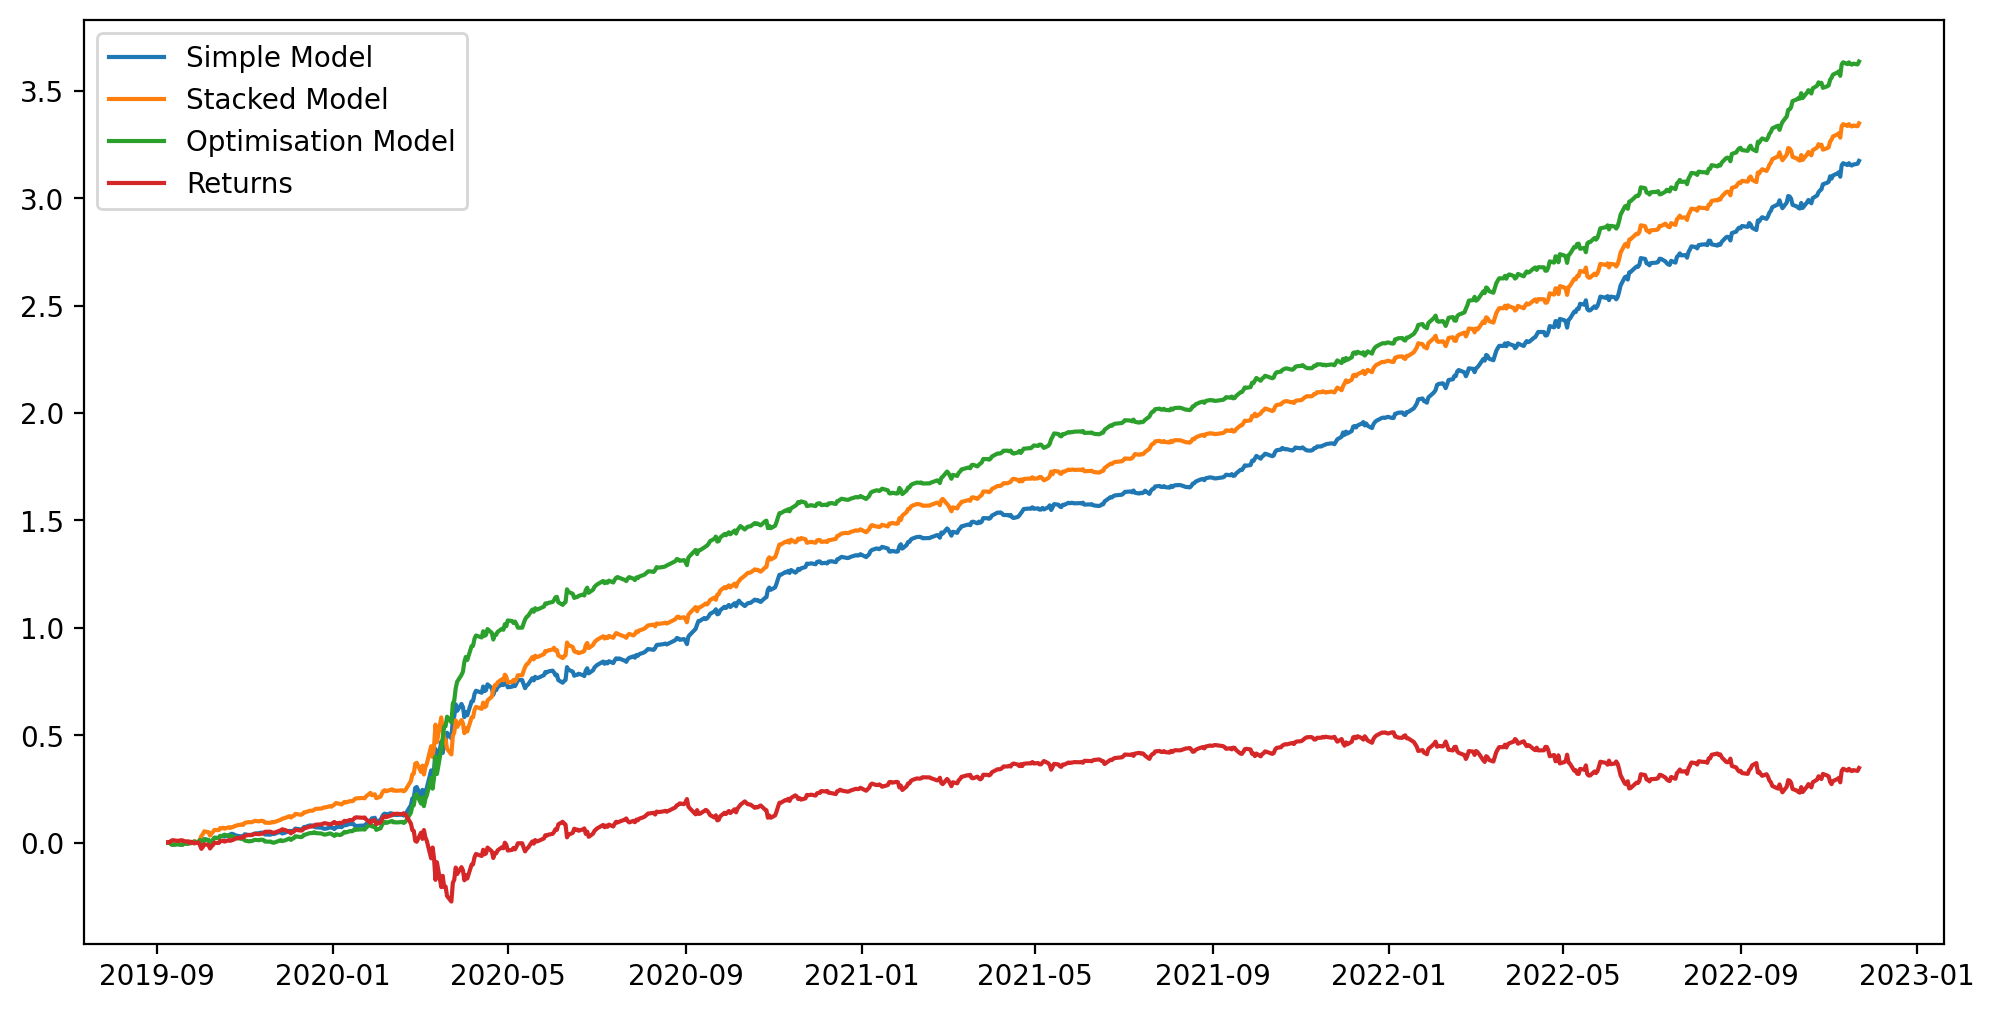

In [103]:
bk_ls = stock_data[['Returns']].loc[X_test.iloc[60:,:].index]
bk_ls['Sign_1'] = bk_lo['Sign_1'].apply(lambda sig: 1 if sig == 1 else (-1 if sig == 0 else sig))
bk_ls['Sign_2'] = bk_lo['Sign_2'].apply(lambda sig: 1 if sig == 1 else (-1 if sig == 0 else sig))
bk_ls['Sign_3'] = bk_lo['Sign_3'].apply(lambda sig: 1 if sig == 1 else (-1 if sig == 0 else sig))

bk_ls['Model_1'] = bk_ls['Returns'] * bk_ls['Sign_1'].fillna(0)
bk_ls['Model_2'] = bk_ls['Returns'] * bk_ls['Sign_2'].fillna(0)
bk_ls['Model_3'] = bk_ls['Returns'] * bk_ls['Sign_3'].fillna(0)

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(bk_ls['Model_1']), label='Simple Model')
plt.plot(np.cumsum(bk_ls['Model_2']), label='Stacked Model')
plt.plot(np.cumsum(bk_ls['Model_3']), label='Optimisation Model')
plt.plot(np.cumsum(bk_ls['Returns']), label='Returns')
plt.legend()
plt.show()

In [104]:
print('Simple LSTM Return:', round(np.cumsum(bk_ls['Model_1'])[-1]*100, 2), '%')
print('Stacked LSTM Return:', round(np.cumsum(bk_ls['Model_2'])[-1]*100, 2), '%')
print('Optimal LSTM Return:', round(np.cumsum(bk_ls['Model_3'])[-1]*100, 2), '%')
print('Holding Return:', round(np.cumsum(bk_ls['Returns'])[-1]*100, 2), '%')

Simple LSTM Return: 317.34 %
Stacked LSTM Return: 334.8 %
Optimal LSTM Return: 363.58 %
Holding Return: 34.67 %
